# Project Description
## Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
## Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
## 1. Problem Statement: 
## a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
## b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Attributes
* Date  - The date of observation
* Location  -The common name of the location of the weather station
* MinTemp  -The minimum temperature in degrees celsius
* MaxTemp -The maximum temperature in degrees celsius
* Rainfall  -The amount of rainfall recorded for the day in mm
* Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine  -The number of hours of bright sunshine in the day.
* WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am -Direction of the wind at 9am
* WindDir3pm -Direction of the wind at 3pm
* WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am -Humidity (percent) at 9am
* Humidity3pm -Humidity (percent) at 3pm
* Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am - Fraction of sky obscured by cloud at 9am. 
* Cloud3pm -Fraction of sky obscured by cloud 
* Temp9am-Temperature (degrees C) at 9am
* Temp3pm -Temperature (degrees C) at 3pm
* RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [4]:
data.shape

(8425, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
data.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

## Filling Nan Values

In [7]:
data['MinTemp'].fillna(data['MinTemp'].mode()[0],inplace=True)
data['MinTemp'].fillna(data['MinTemp'].mode()[0],inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mode()[0],inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mode()[0],inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mode()[0],inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mode()[0],inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mode()[0],inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mode()[0],inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mode()[0],inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mode()[0],inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mode()[0],inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mode()[0],inplace=True)
data['Sunshine'].fillna(data['Sunshine'].median(),inplace=True)
data['Sunshine'].fillna(data['Sunshine'].median(),inplace=True)
data['Evaporation'].fillna(data['Evaporation'].median(),inplace=True)
data['Evaporation'].fillna(data['Evaporation'].median(),inplace=True)
data['Cloud3pm'].fillna(data['Cloud3pm'].median(),inplace=True)
data['Cloud3pm'].fillna(data['Cloud3pm'].median(),inplace=True)
data['Cloud9am'].fillna(data['Cloud9am'].median(),inplace=True)
data['Cloud9am'].fillna(data['Cloud9am'].median(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].median(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].median(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].median(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].median(),inplace=True)
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0],inplace=True)
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0],inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].median(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].median(),inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0],inplace=True)
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0],inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0],inplace=True)
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0],inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].median(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].median(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].median(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].median(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].median(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].median(),inplace=True)

In [8]:
data.isna().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Separating Numerical and Categorical columns

In [11]:
# seperating the categorical columns
cat_features= data.select_dtypes(include=[np.object])

In [12]:
cat_features.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
cat_features.drop('Date',axis=1,inplace=True)

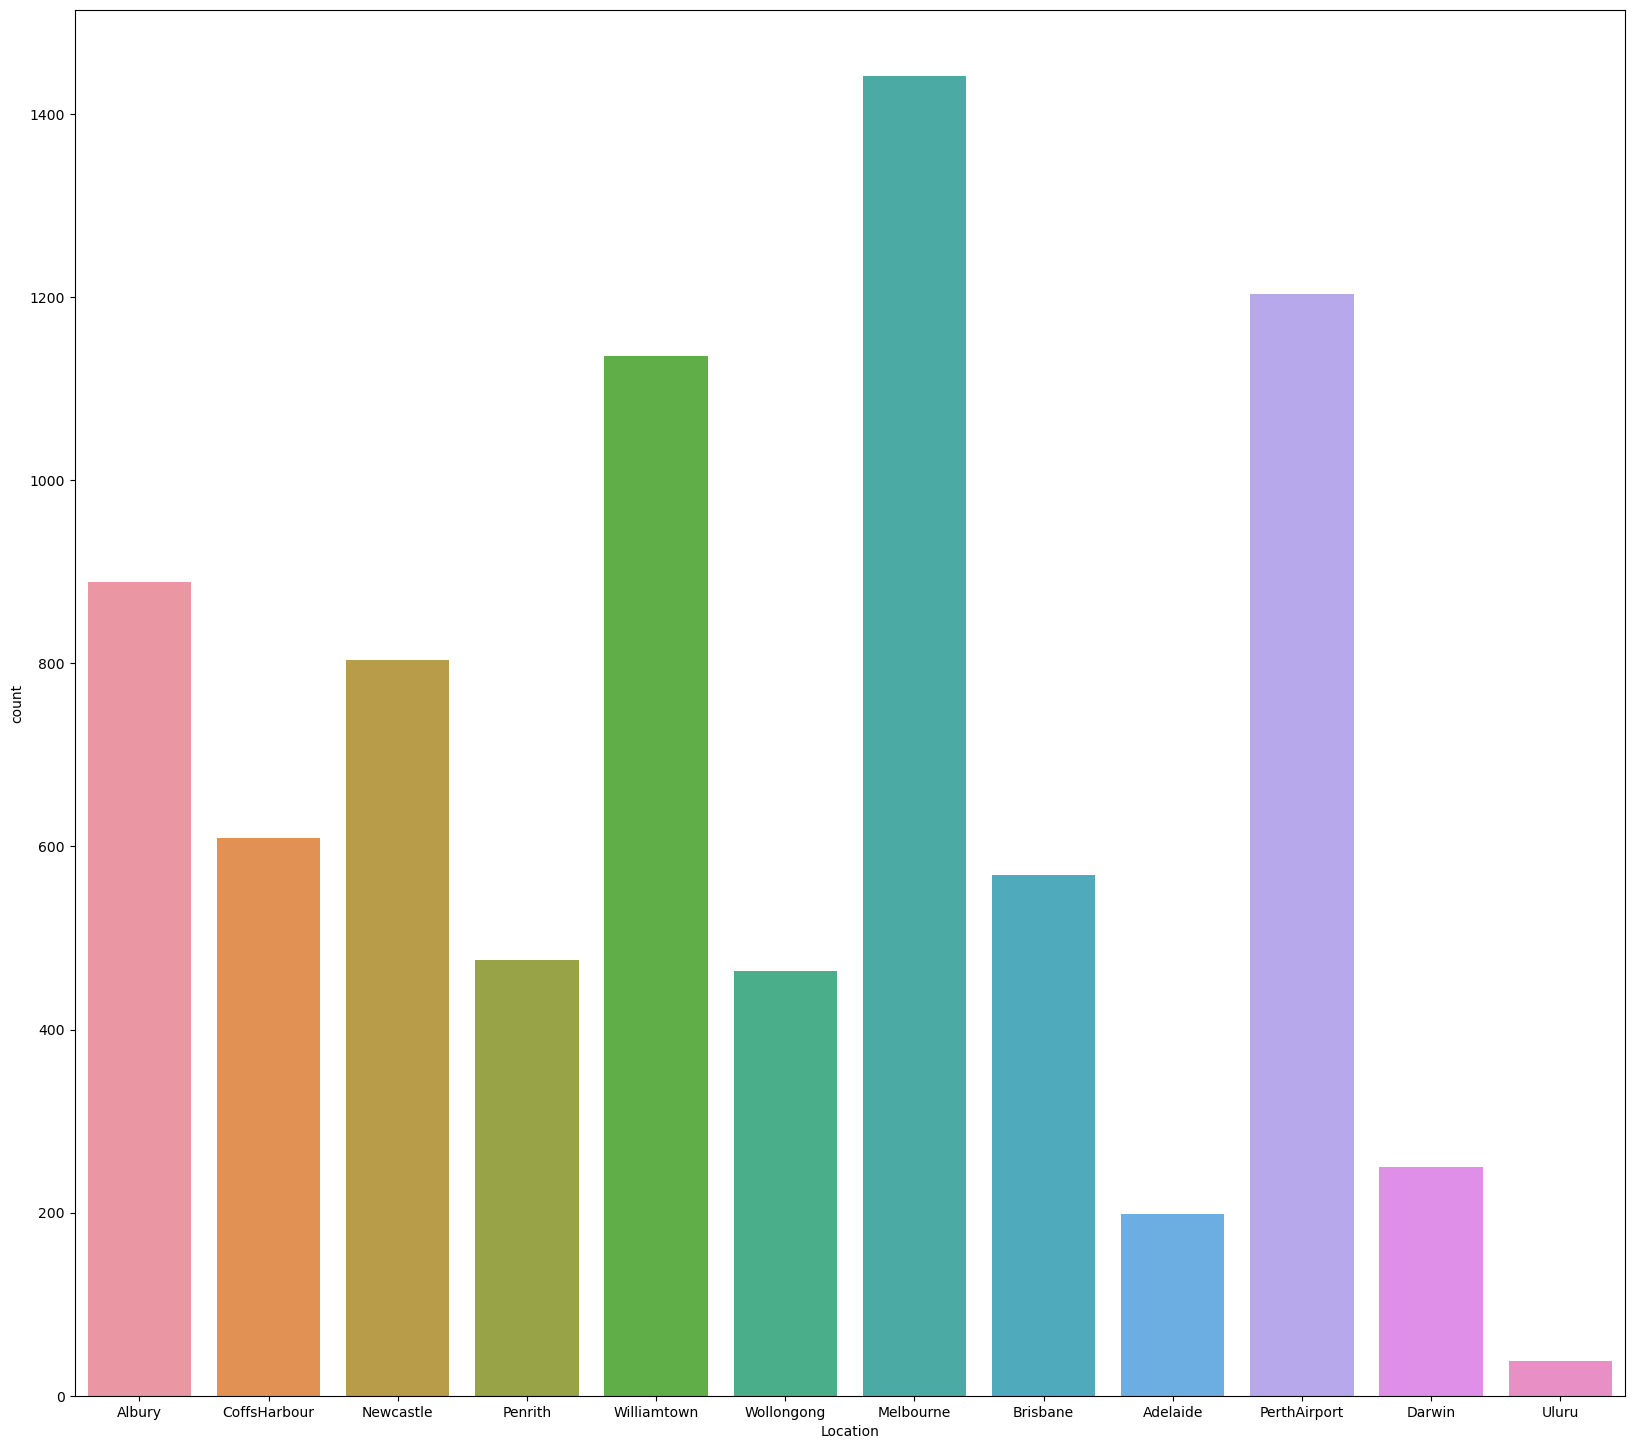

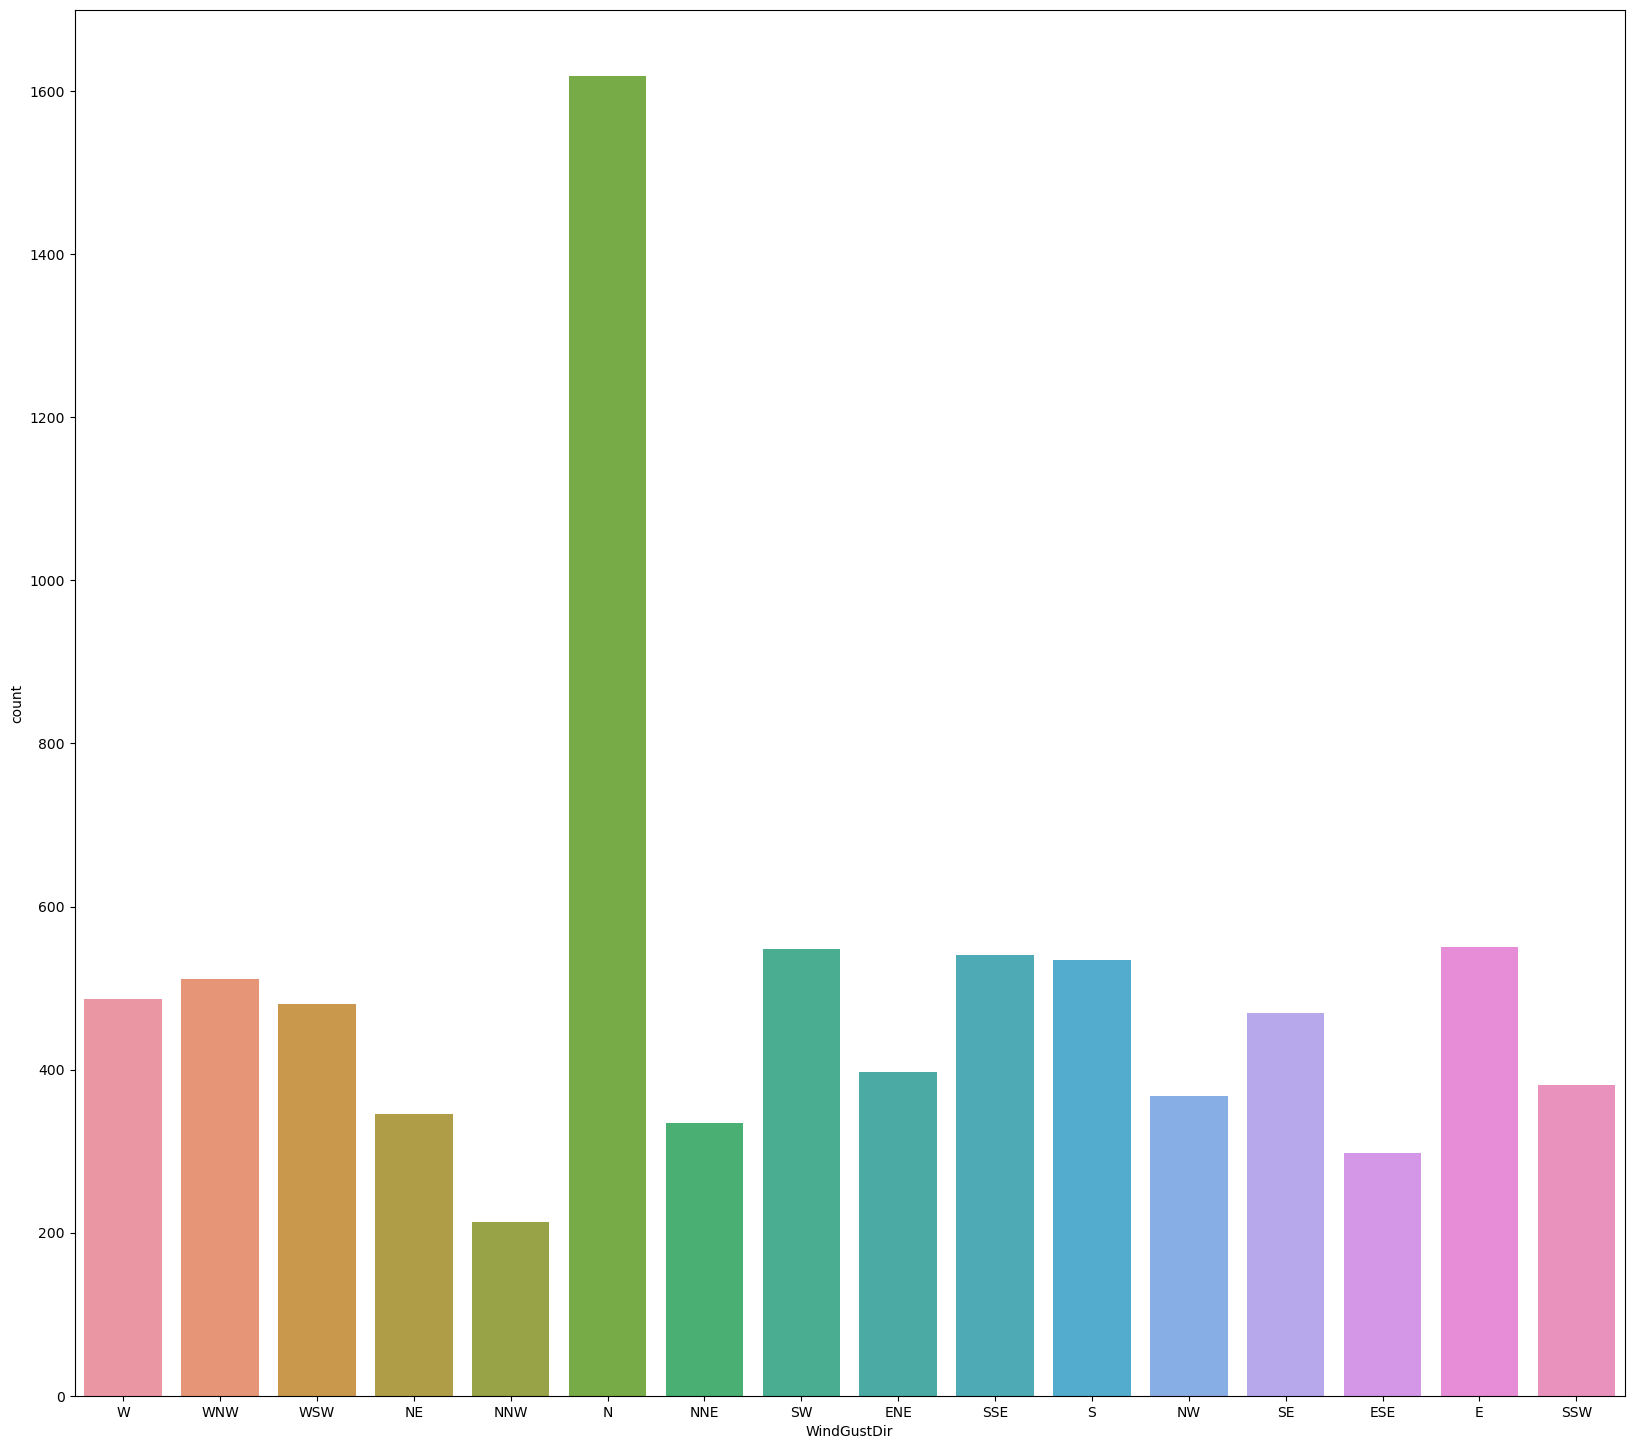

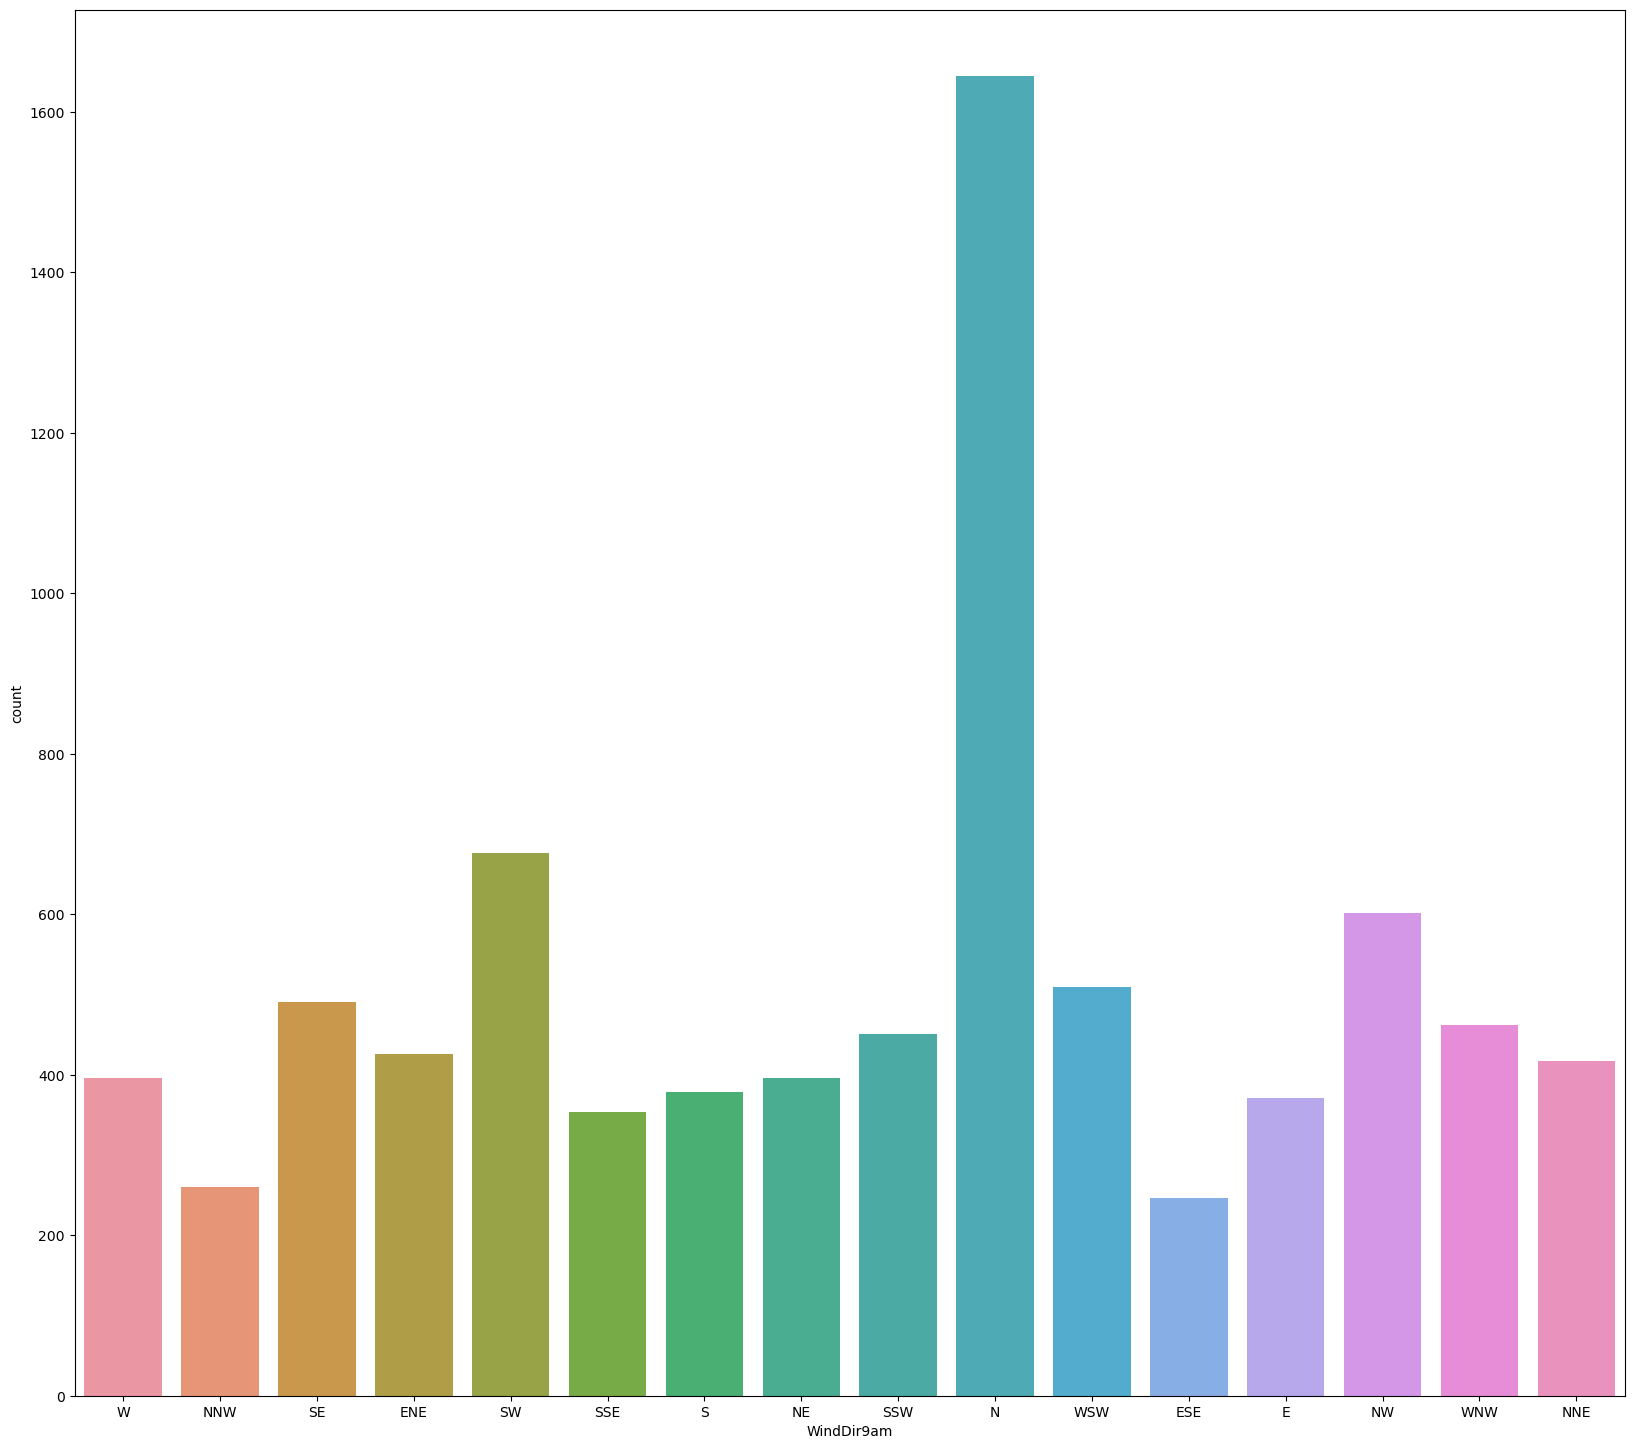

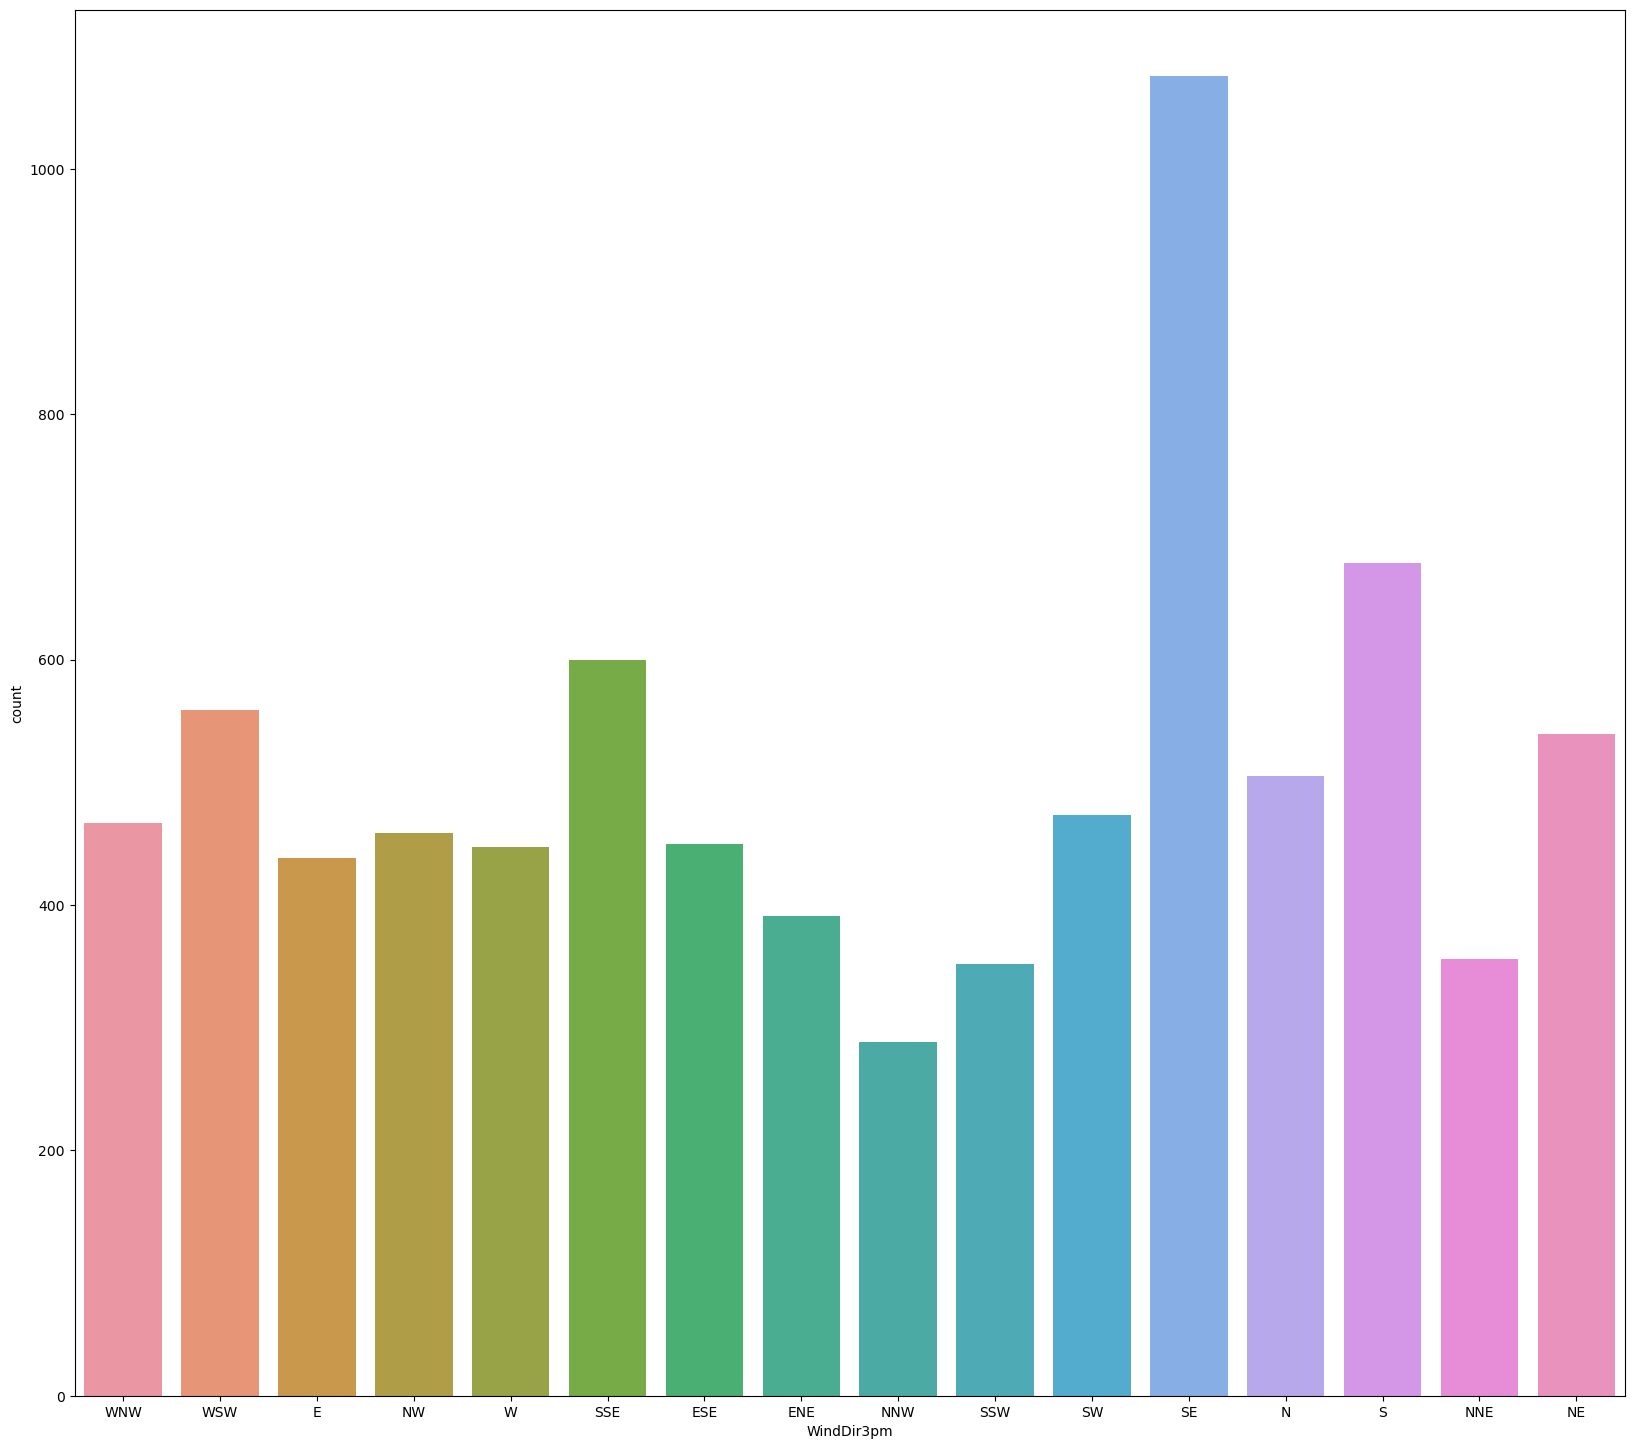

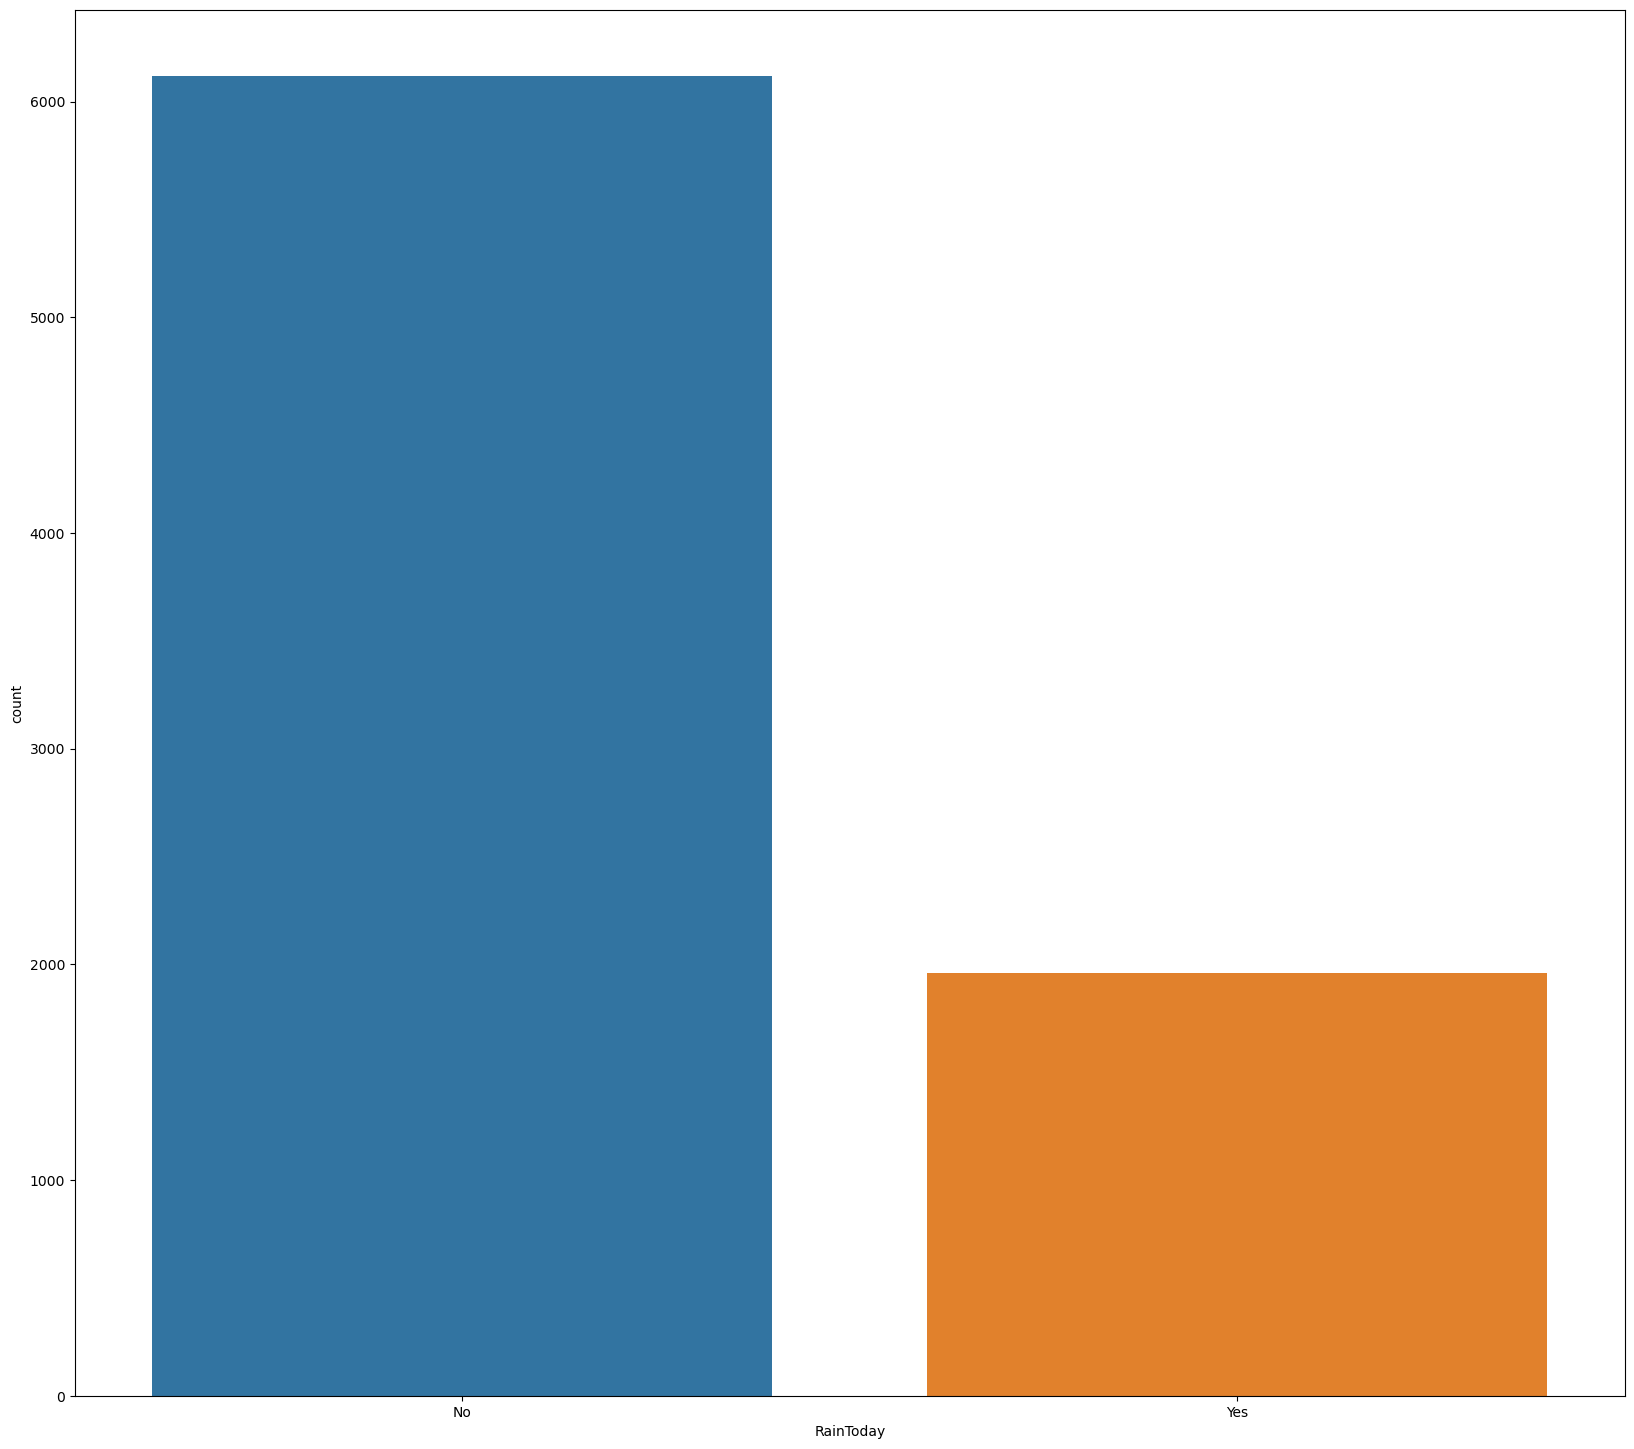

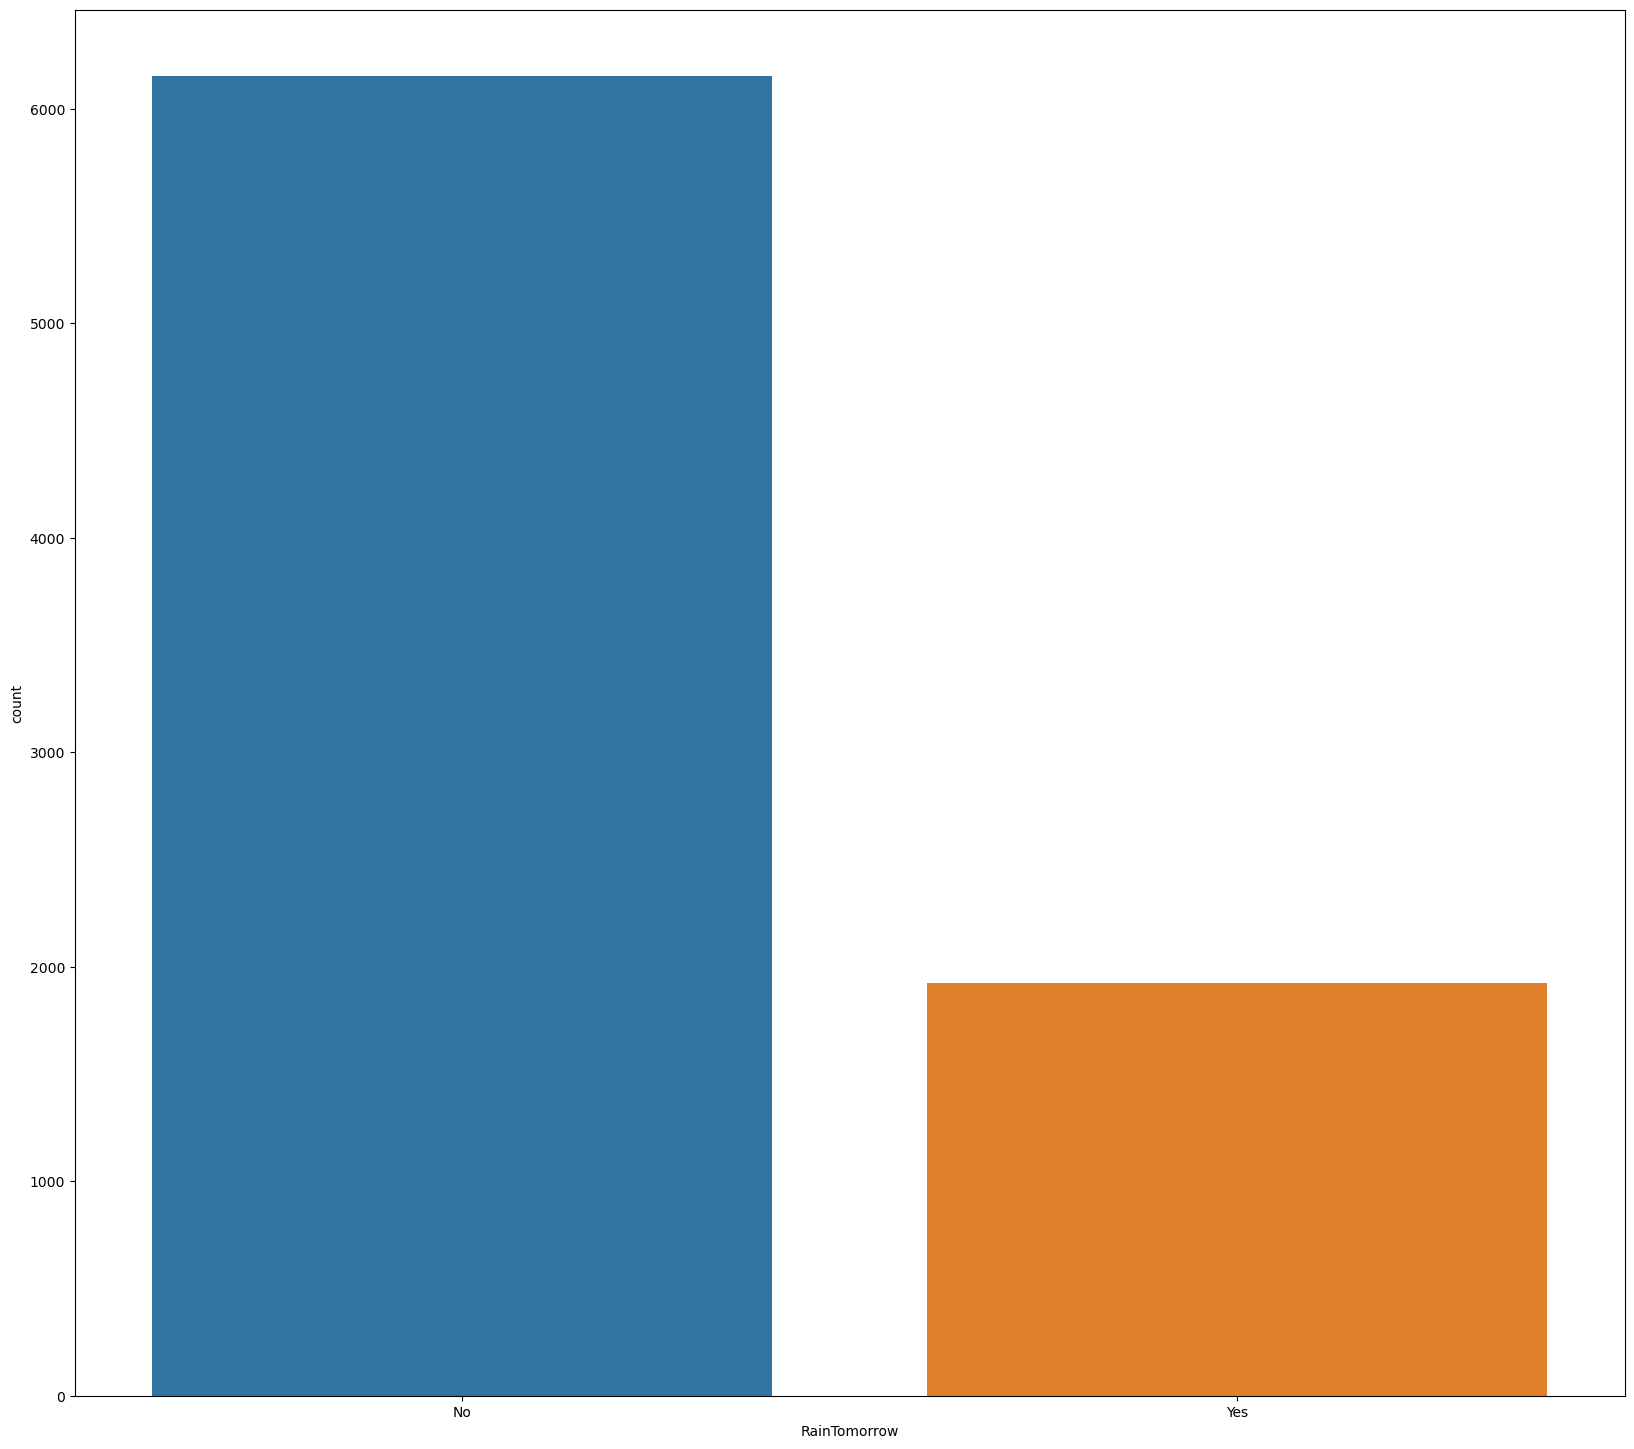

In [14]:
for col in cat_features :
    plt.figure(figsize=(20,18))
    sns.countplot(x=cat_features[col])
    plt.show()

In [15]:
num_features = data.select_dtypes(include=[np.number])

In [16]:
num_features.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

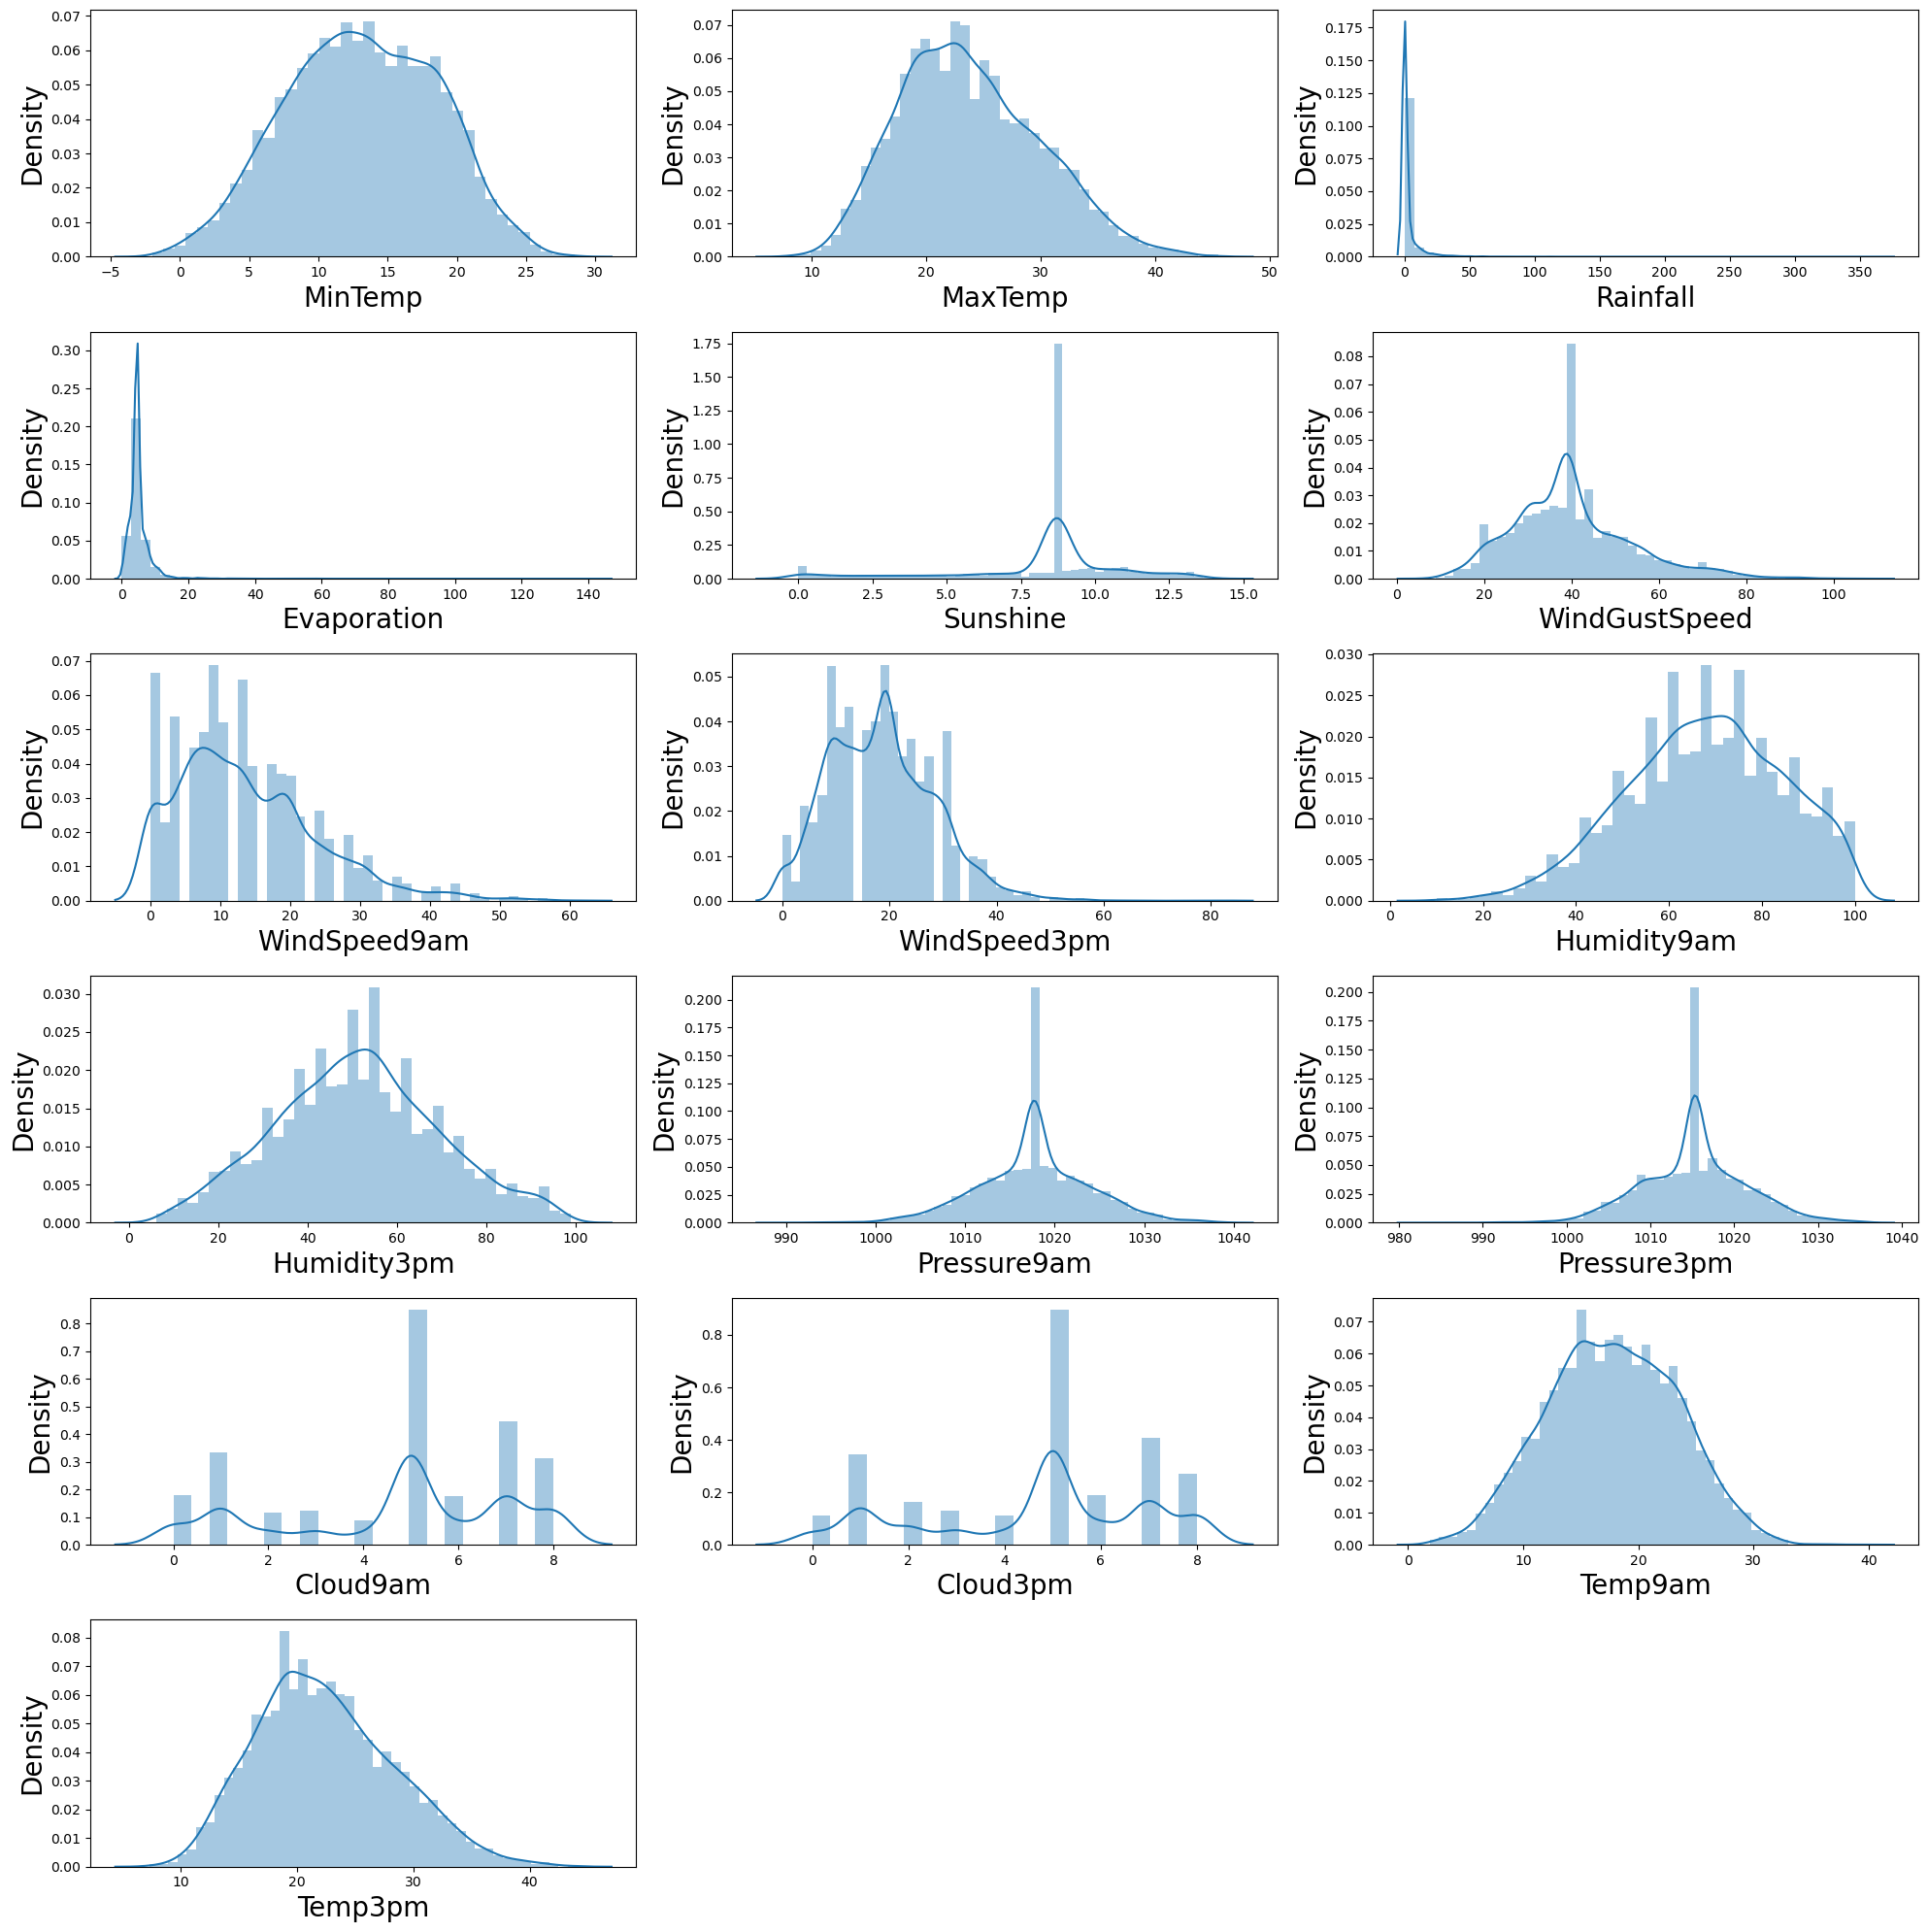

In [17]:
plt.figure(figsize=(20,20))
plotnumber= 1

for column in num_features:
    if plotnumber<=18:
        ax= plt.subplot(6,3, plotnumber)
        sns.distplot(num_features[column])
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

## Observation:
* Max temp silghtly skewed towards right

* Evaporation, Rainfall, WindGustSpeed, Windspeed9am, WindSpeed3pm skewed towards right

* Humidity skewed towards left

* Rest seems to be normally distributed

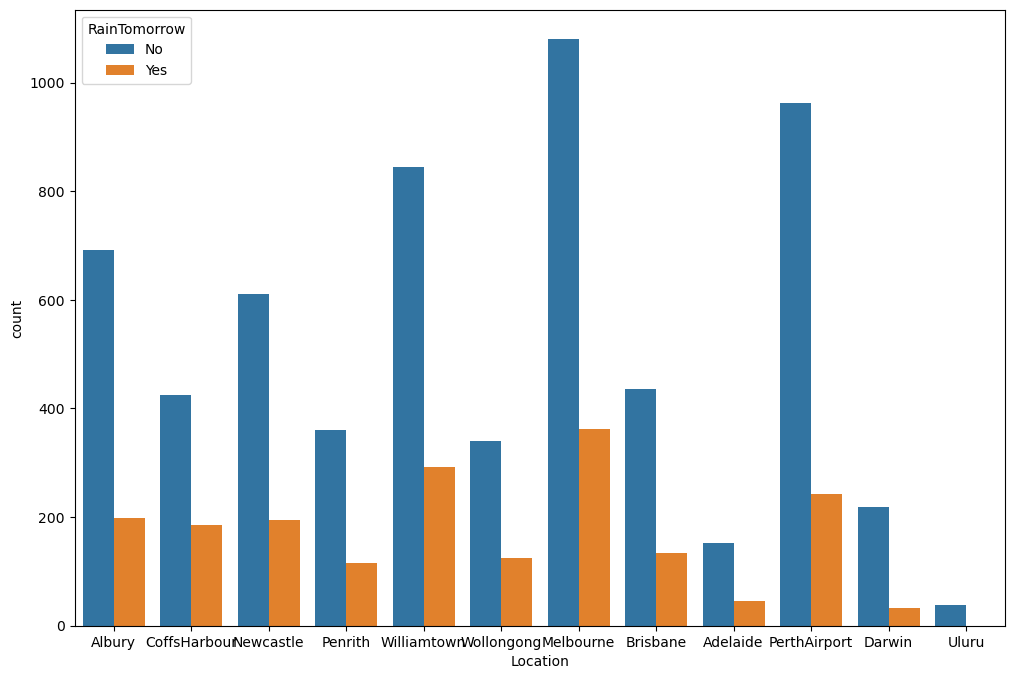

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x=data['Location'],hue=data['RainTomorrow']);

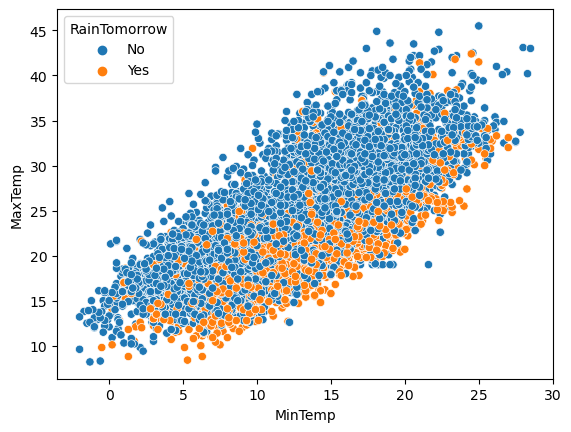

In [19]:
sns.scatterplot(x=data['MinTemp'],y=data['MaxTemp'],hue=data['RainTomorrow']);

At higher temperature chances of rain is less

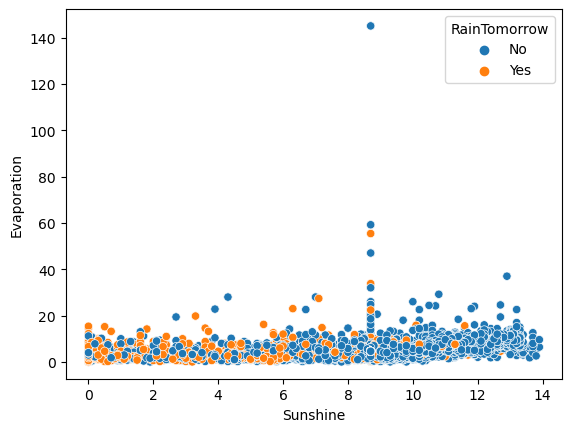

In [20]:
sns.scatterplot(x=data['Sunshine'],y=data['Evaporation'],hue=data['RainTomorrow']);

More sunshine less the chances of rain, no relation between evaporation and sunshine

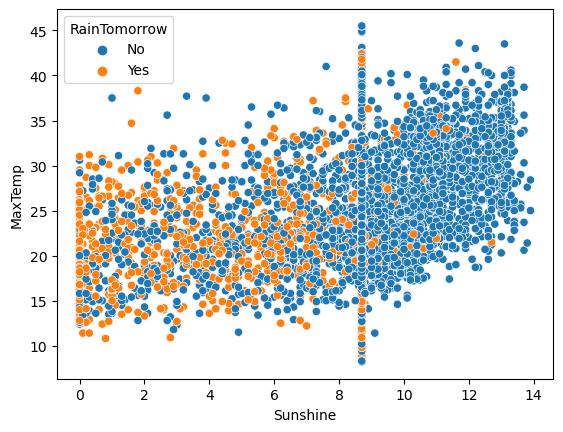

In [21]:
sns.scatterplot(x=data['Sunshine'],y=data['MaxTemp'],hue=data['RainTomorrow']);

No relation between Sunshine and Max temp

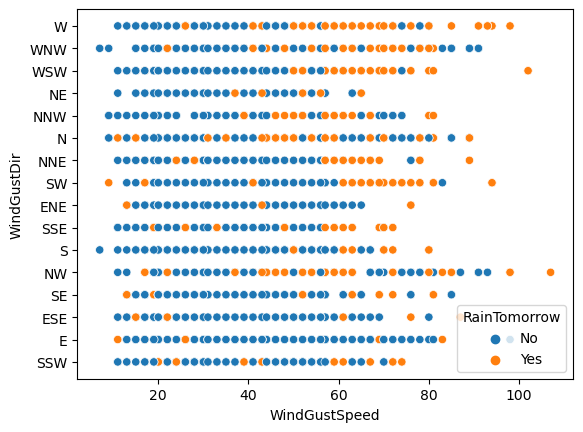

In [22]:
sns.scatterplot(x=data['WindGustSpeed'],y=data['WindGustDir'],hue=data['RainTomorrow']);

* Wind direcrtion is east the possiblity of rain is almost nil
* At higher wind speed the chances of rain is high
* No relation between WindGustSpeed and WindGustDir

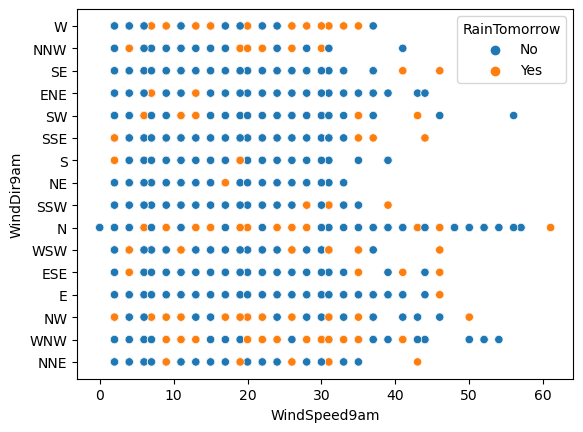

In [23]:
sns.scatterplot(x=data['WindSpeed9am'],y=data['WindDir9am'],hue=data['RainTomorrow']);

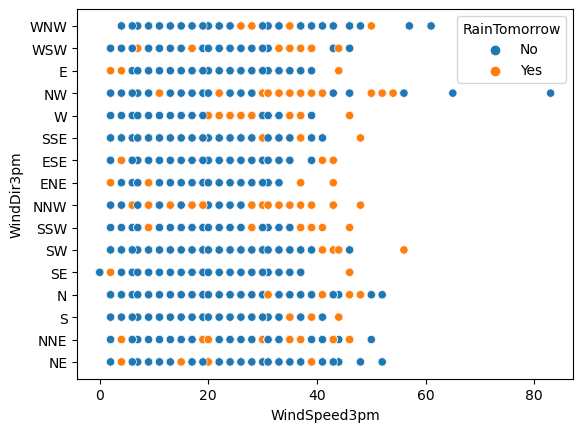

In [24]:
sns.scatterplot(x=data['WindSpeed3pm'],y=data['WindDir3pm'],hue=data['RainTomorrow']);

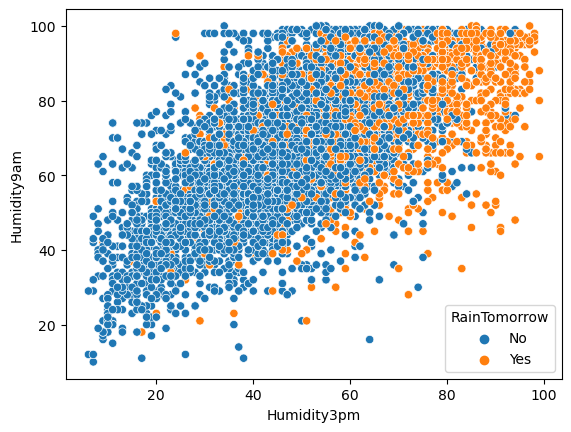

In [25]:
sns.scatterplot(x=data['Humidity3pm'],y=data['Humidity9am'],hue=data['RainTomorrow']);

Higher humidity at 3pm the chance of rainfall is high

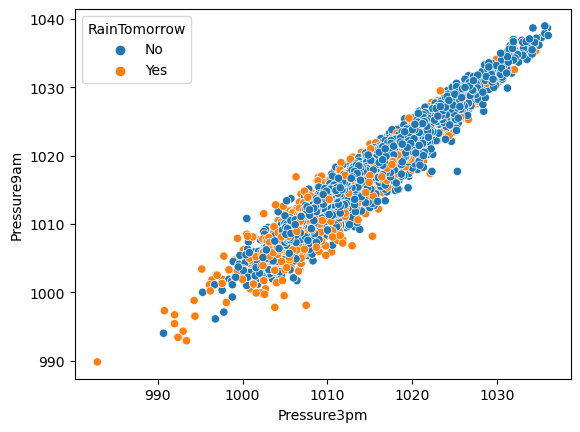

In [26]:
sns.scatterplot(x=data['Pressure3pm'],y=data['Pressure9am'],hue=data['RainTomorrow']);

 Pressure9am id directly proportional to Pressure3pm

<AxesSubplot:xlabel='Cloud3pm', ylabel='Cloud9am'>

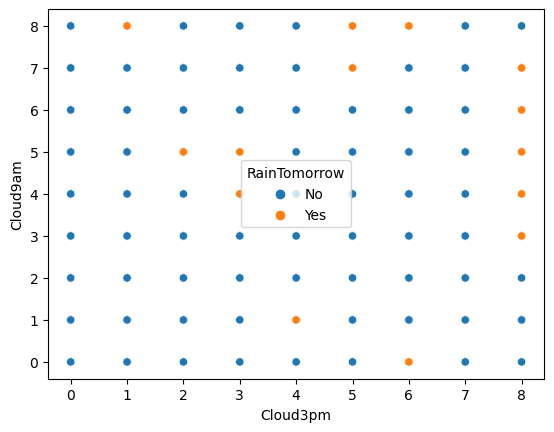

In [27]:
sns.scatterplot(x=data['Cloud3pm'],y=data['Cloud9am'],hue=data['RainTomorrow'])

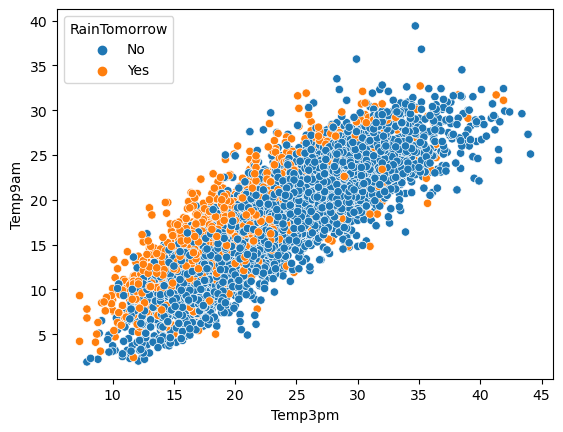

In [28]:
sns.scatterplot(x=data['Temp3pm'],y=data['Temp9am'],hue=data['RainTomorrow']);

Temp9 is proportional to Temp3

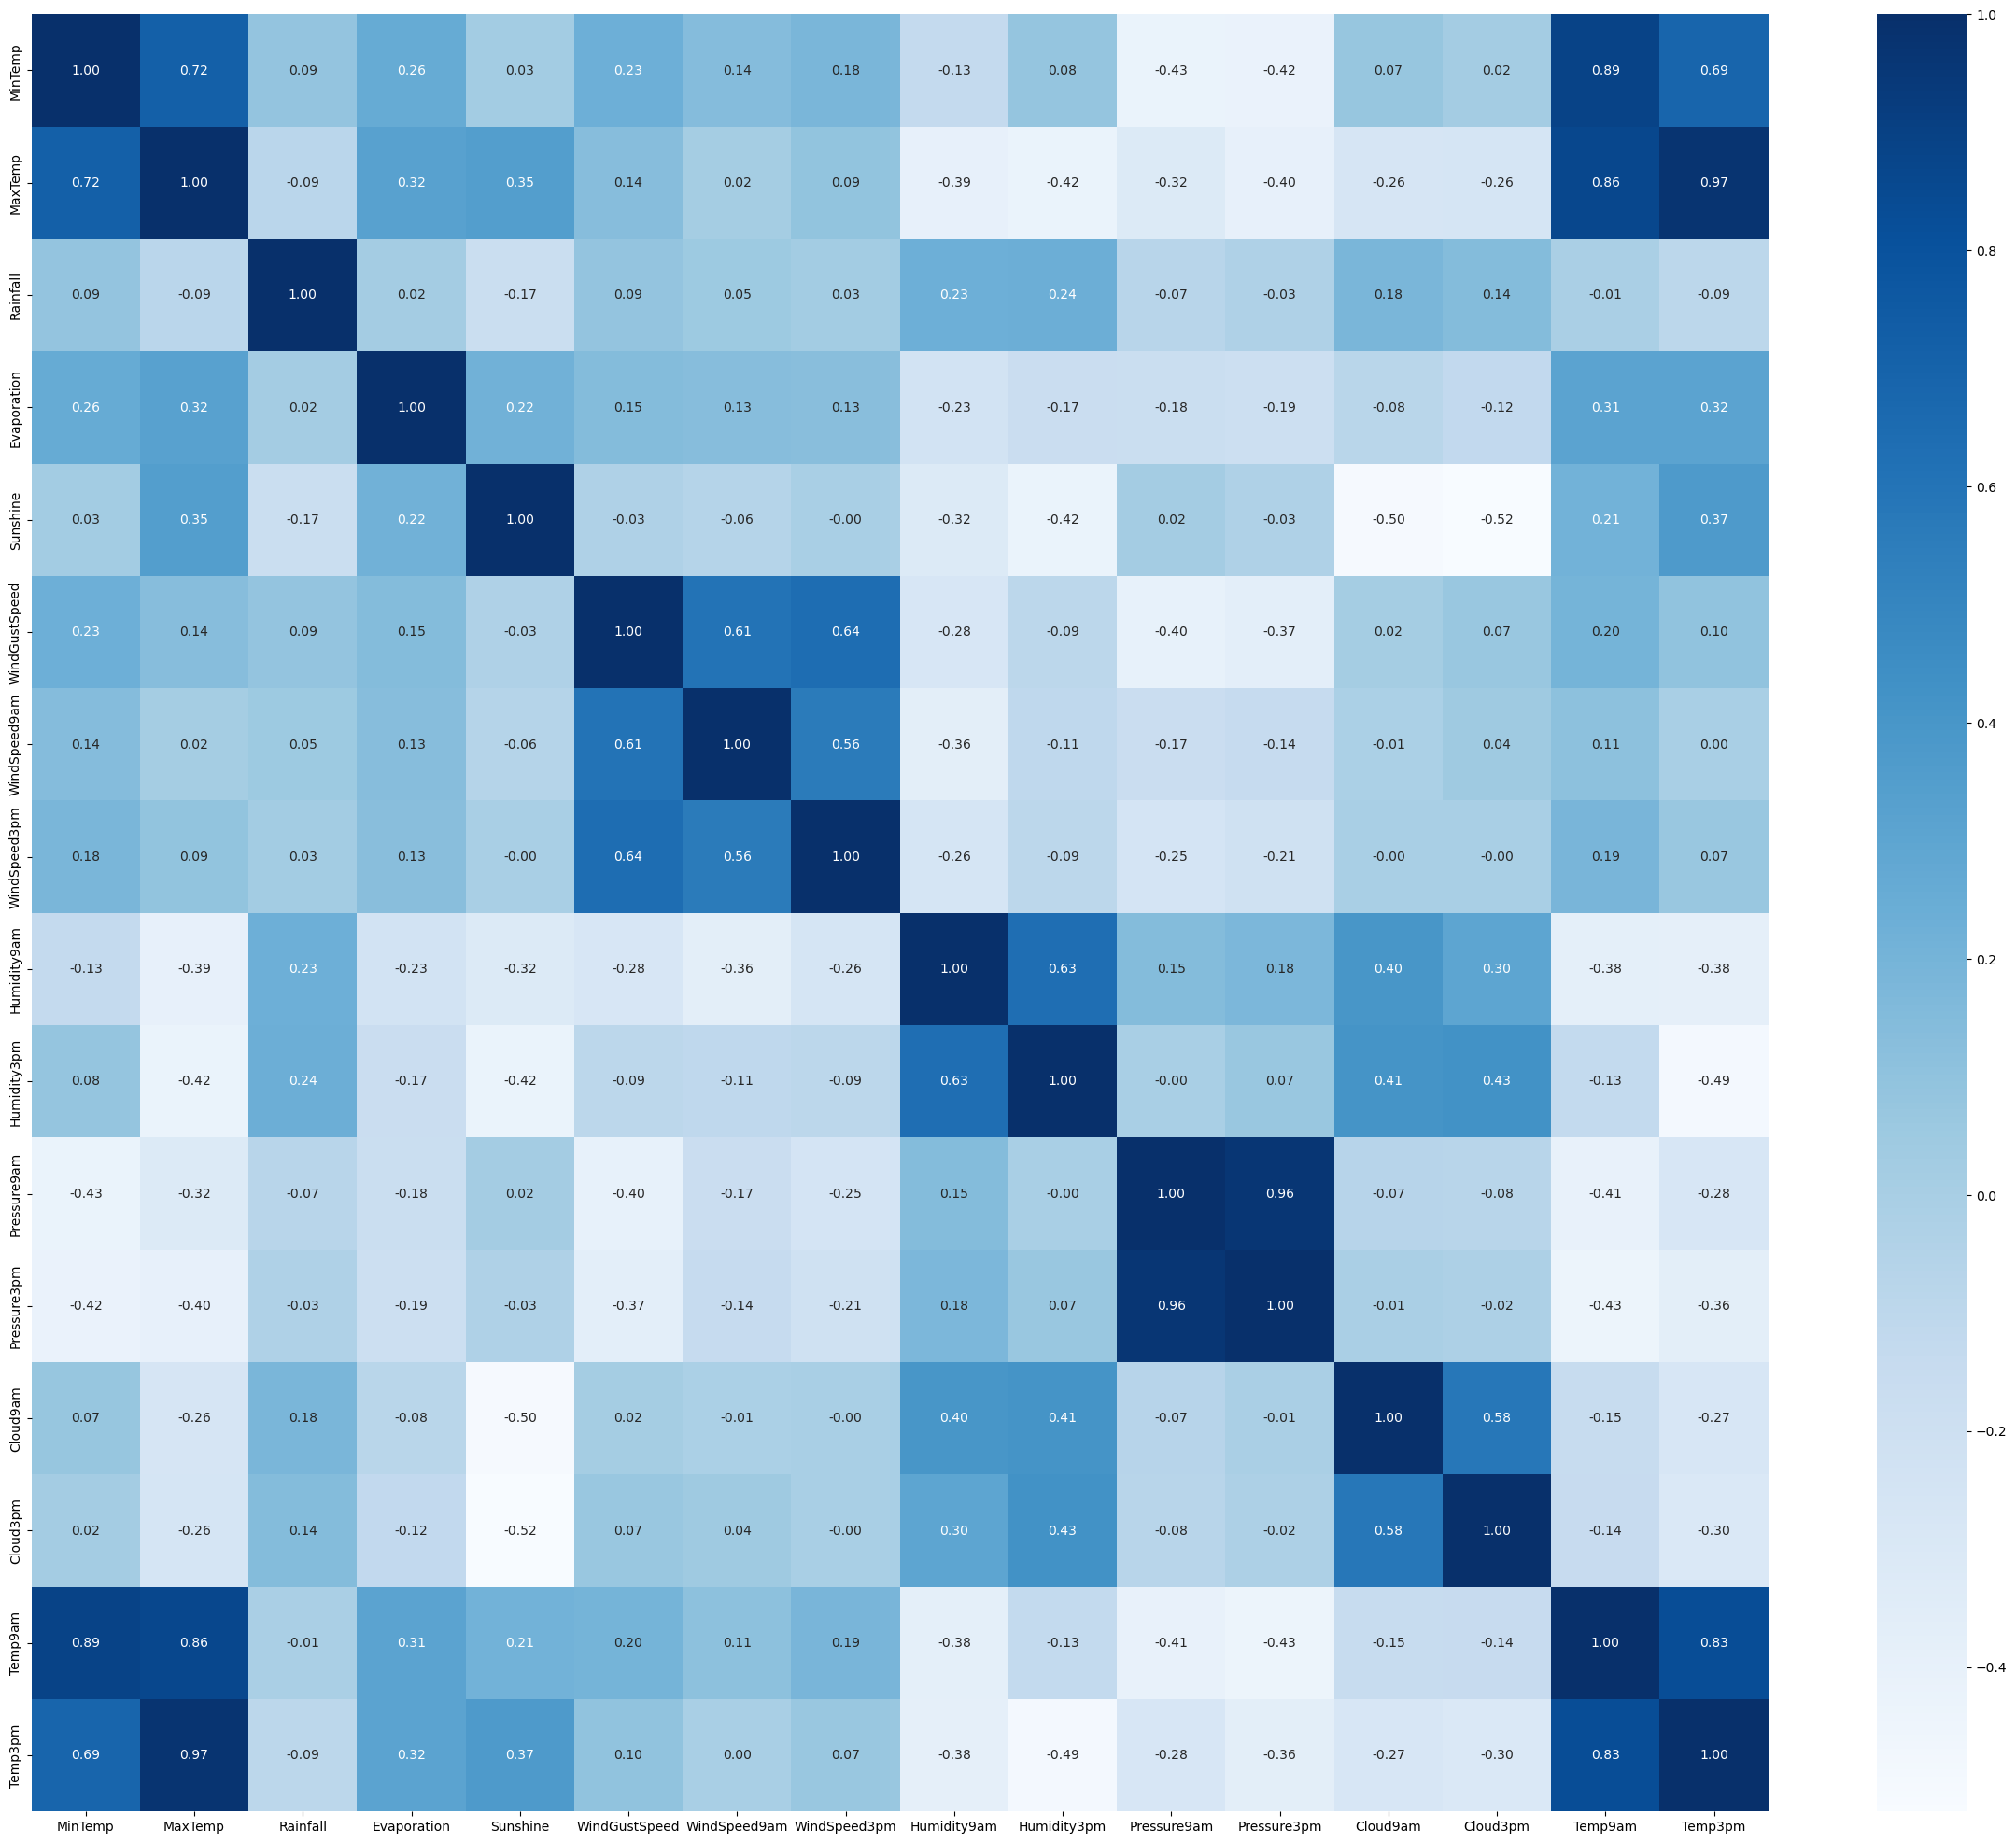

In [29]:
# Lets check correlation
plt.figure(figsize=(30,25))
sns.heatmap(data.corr(),annot=True,cmap='Blues',fmt='.2f');

Convering Date Feature to datetime

In [30]:
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day
data.drop('Date',axis=1,inplace=True)

In [31]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,4.6,8.7,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.6,8.7,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.6,8.7,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.6,8.7,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.6,8.7,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


checking for ouliers and skewness

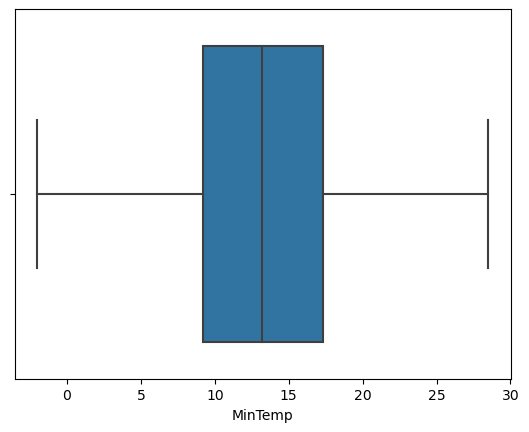

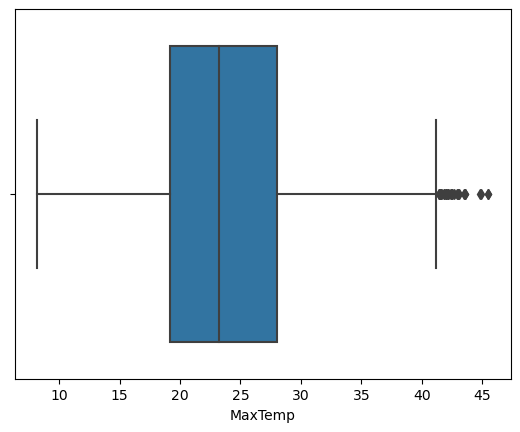

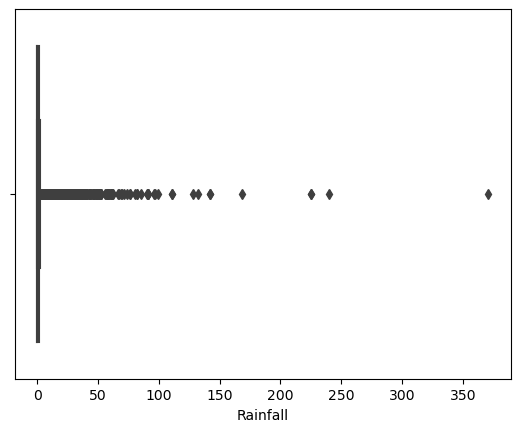

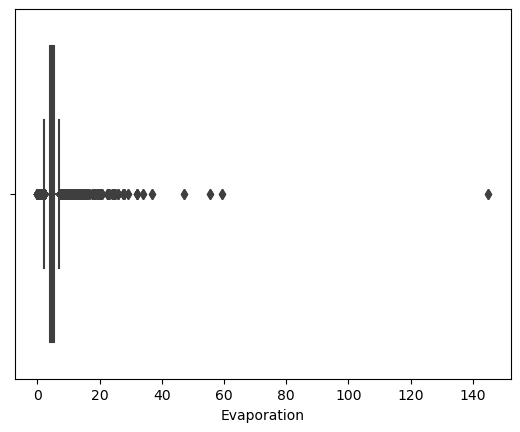

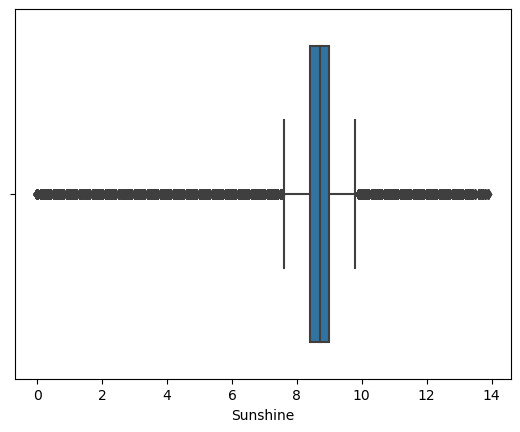

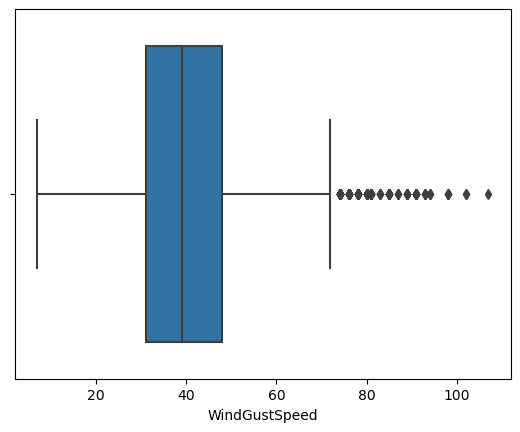

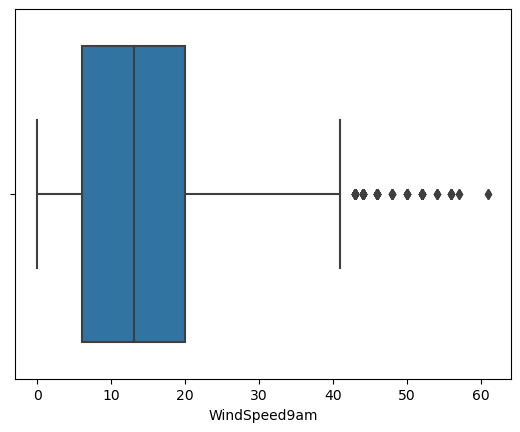

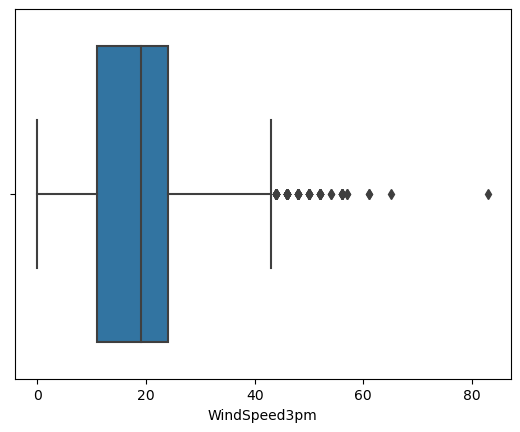

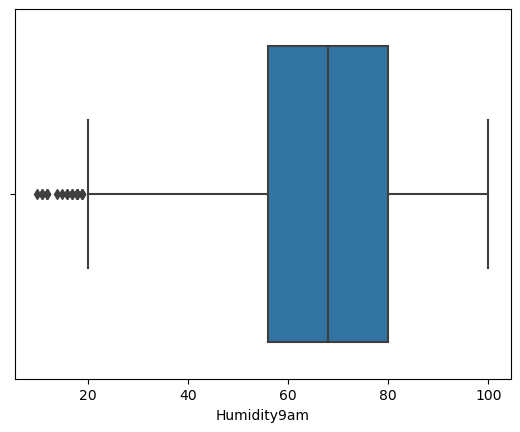

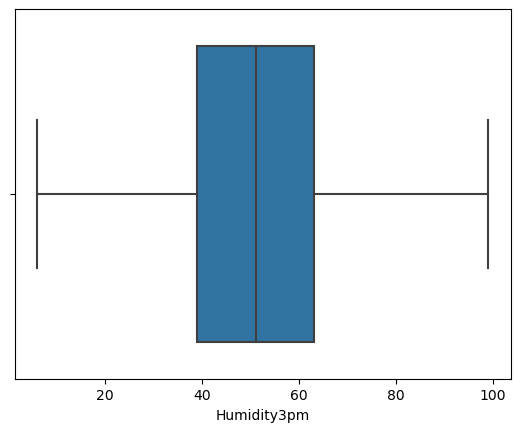

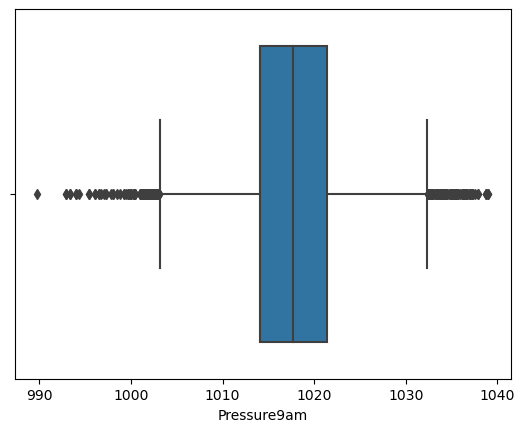

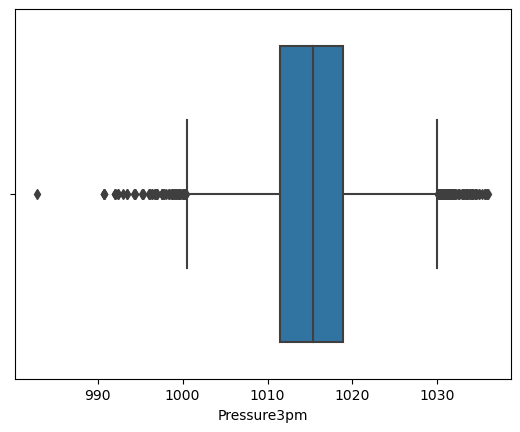

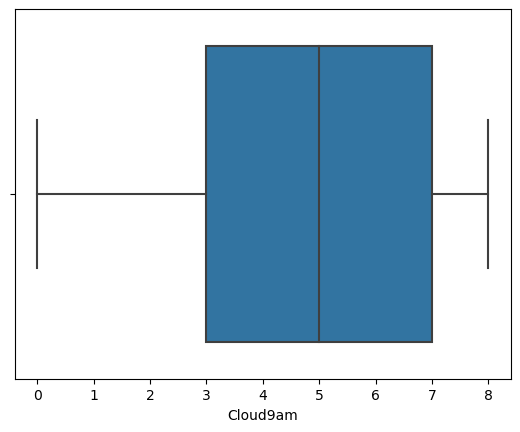

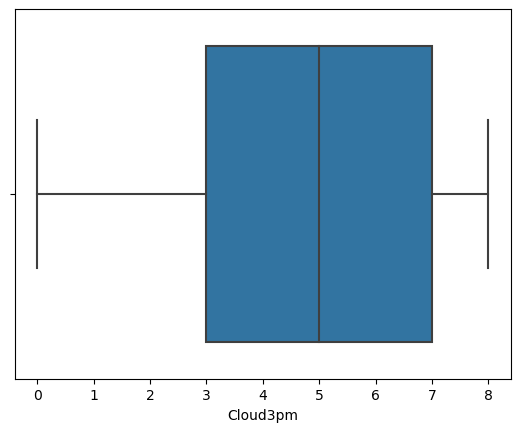

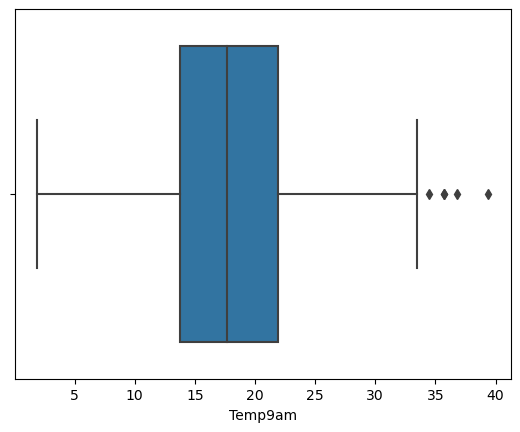

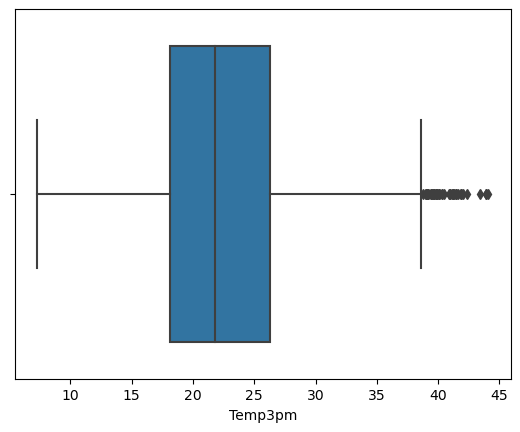

In [32]:
for i in num_features:
    sns.boxplot(data[i])
    plt.show()

In [33]:
for i in num_features:
    IQR= data[i].quantile(.75)-data[i].quantile(.25)
    lower=data[i].quantile(.25) - (1.5 * IQR)
    upper=data[i].quantile(.75) + (1.5 * IQR)
    data[i]=np.where(data[i]<lower,lower,data[i])
    data[i]=np.where(data[i]>upper,upper,data[i])

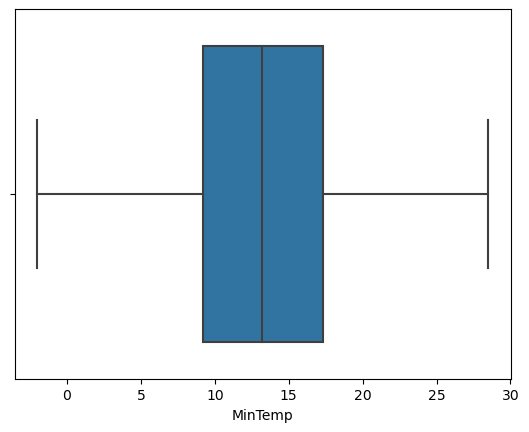

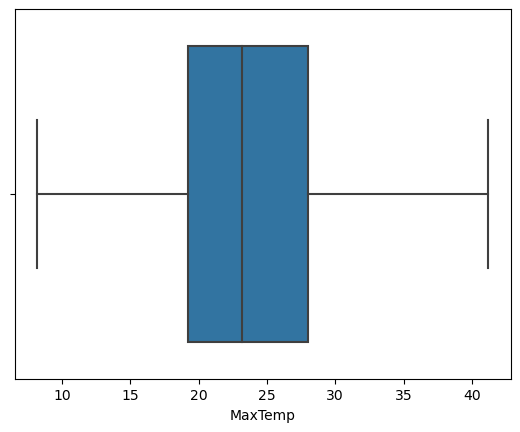

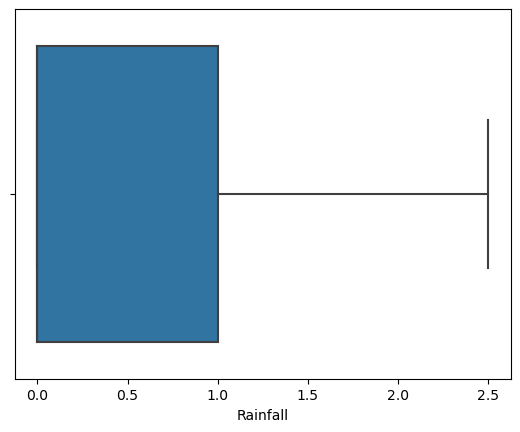

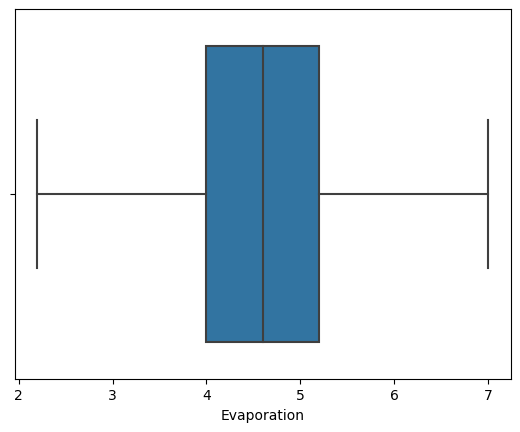

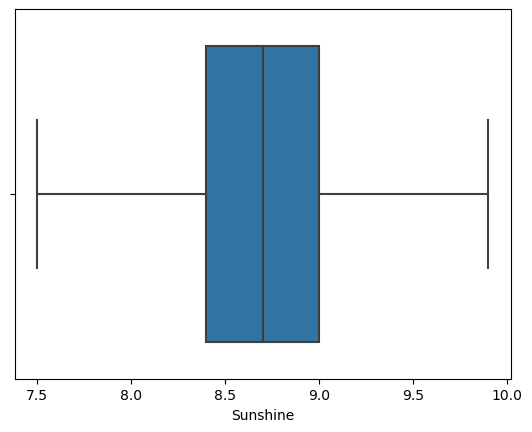

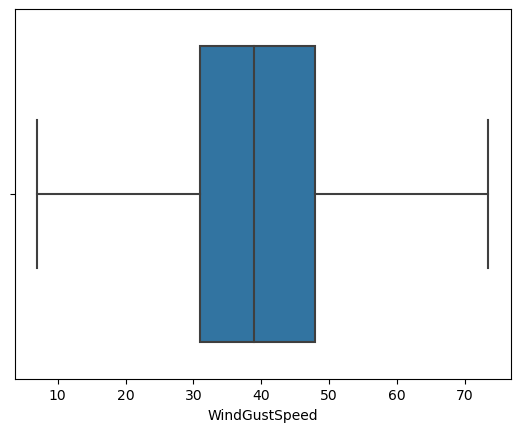

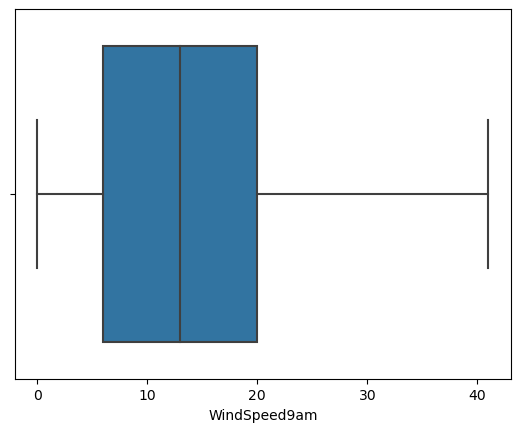

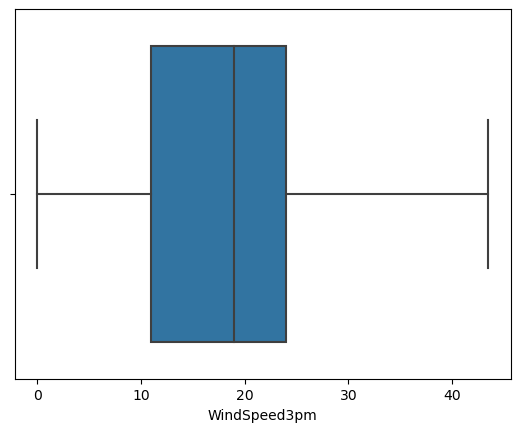

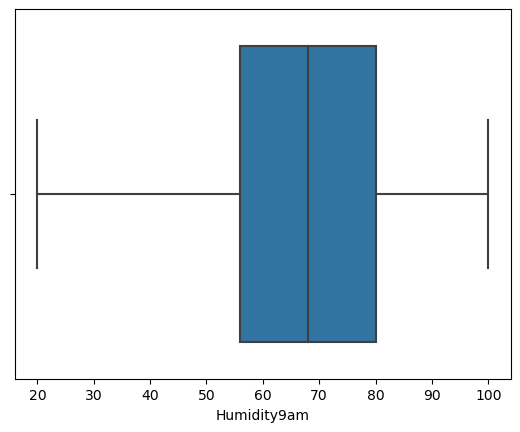

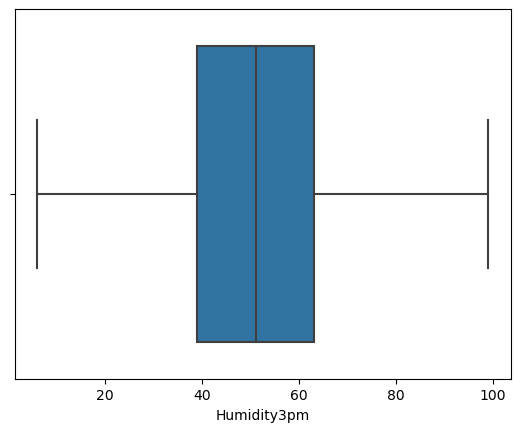

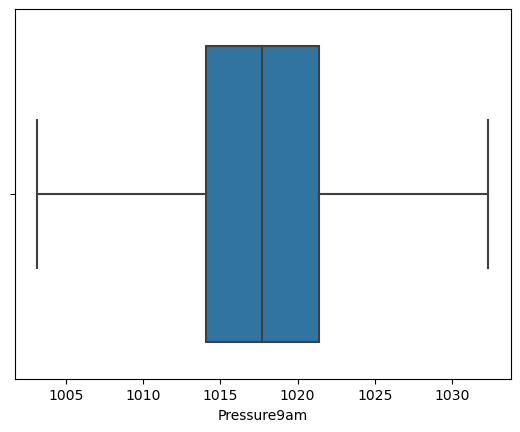

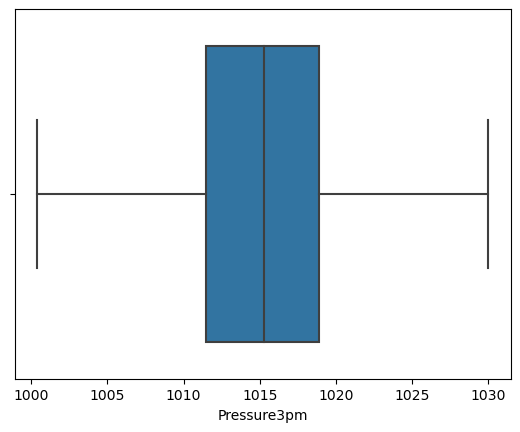

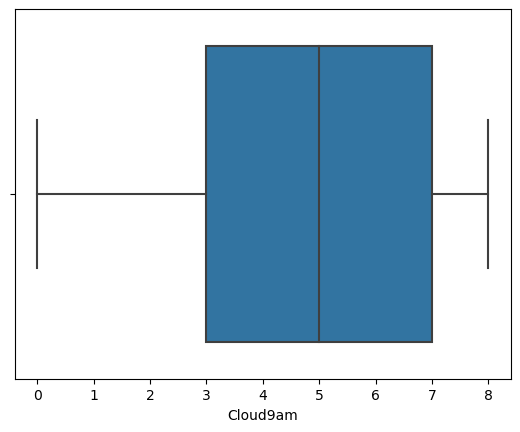

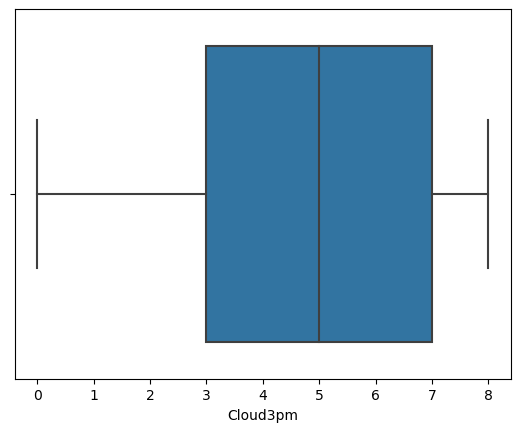

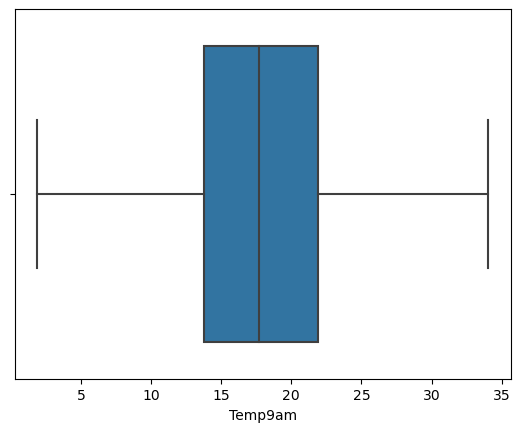

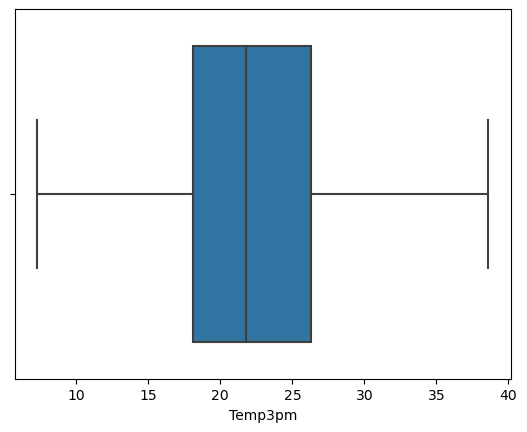

In [34]:
for i in num_features:
    sns.boxplot(data[i])
    plt.show()

In [35]:
data.skew()

MinTemp         -0.068872
MaxTemp          0.374613
Rainfall         1.226519
Evaporation      0.061994
Sunshine        -0.015949
WindGustSpeed    0.551604
WindSpeed9am     0.741114
WindSpeed3pm     0.342433
Humidity9am     -0.240550
Humidity3pm      0.113801
Pressure9am     -0.000940
Pressure3pm      0.022021
Cloud9am        -0.488539
Cloud3pm        -0.438868
Temp9am         -0.012396
Temp3pm          0.371968
year             0.421639
month            0.054225
day              0.000577
dtype: float64

Encoding Categorical Variable

In [36]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
OE.fit(data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']])
data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']] = OE.transform(data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']])

In [37]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,1.0,13.4,22.9,0.6,4.6,8.7,13.0,44.0,13.0,14.0,...,1007.1,8.0,5.0,16.9,21.8,0.0,0.0,2008,12,1
1,1.0,7.4,25.1,0.0,4.6,8.7,14.0,44.0,6.0,15.0,...,1007.8,5.0,5.0,17.2,24.3,0.0,0.0,2008,12,2
2,1.0,12.9,25.7,0.0,4.6,8.7,15.0,46.0,13.0,15.0,...,1008.7,5.0,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,1.0,9.2,28.0,0.0,4.6,8.7,4.0,24.0,9.0,0.0,...,1012.8,5.0,5.0,18.1,26.5,0.0,0.0,2008,12,4
4,1.0,17.5,32.3,1.0,4.6,8.7,13.0,41.0,1.0,7.0,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


Visualizing correlation between features and target

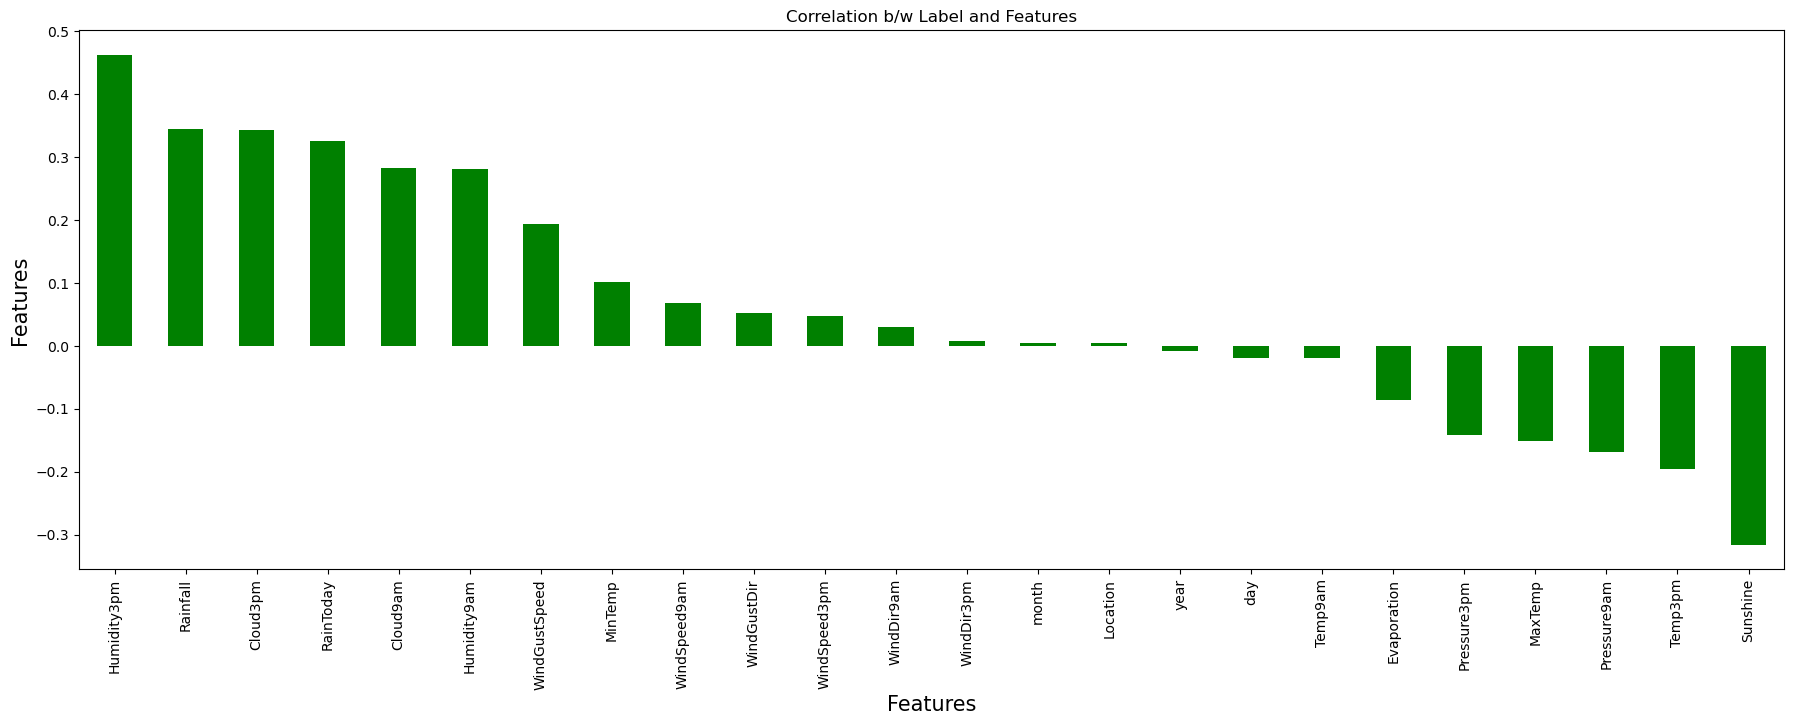

In [38]:
plt.figure(figsize=(22,7))
data.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.title('Correlation b/w Label and Features')
plt.show()

Rain Tomorrow has -ve correlation sunshine

Rain tomorrow has moderate +ve relation with Rainfall,Humidity9am,Humidity3pm, Cloud9am,Cloud9pm

# Building model for rain tomorrow

In [39]:
x = data.drop('RainTomorrow',axis=1)
y = data['RainTomorrow']

Scaling the data Using Standard Scaler

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
0,-1.504557,0.048398,-0.152436,-0.008410,-0.022834,0.009588,1.231615,0.325430,1.252672,1.396867,...,-1.653492,-1.364419,1.358268,0.161068,-0.150403,-0.101901,-0.565772,-1.649084,1.651735,-1.678095
1,-1.504557,-1.060100,0.208553,-0.608793,-0.022834,0.009588,1.443837,0.325430,-0.273018,1.622461,...,-1.175419,-1.248063,0.140845,0.161068,-0.096925,0.321410,-0.565772,-1.649084,1.651735,-1.564377
2,-1.504557,-0.043977,0.307004,-0.608793,-0.022834,0.009588,1.656059,0.476309,1.252672,1.622461,...,-1.669977,-1.098463,0.140845,-1.124771,0.580467,0.135153,-0.565772,-1.649084,1.651735,-1.450659
3,-1.504557,-0.727551,0.684401,-0.608793,-0.022834,0.009588,-0.678379,-1.183364,0.380849,-1.761435,...,-0.021452,-0.416952,0.140845,0.161068,0.063510,0.693924,-0.565772,-1.649084,1.651735,-1.336941
4,-1.504557,0.805871,1.389969,0.391845,-0.022834,0.009588,1.231615,0.099111,-1.362797,-0.182284,...,-1.142449,-1.547263,0.952460,1.446908,0.010032,1.235762,-0.565772,-1.649084,1.651735,-1.223223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,1.016050,-1.780624,-0.332930,-0.608793,-0.022834,0.009588,-1.527265,-0.655286,-1.144841,-1.761435,...,1.149001,0.979314,0.140845,0.161068,-1.487360,-0.254292,-0.565772,1.984448,-0.110867,0.482544
8075,1.016050,-1.909948,-0.070393,-0.608793,-0.022834,0.009588,-1.527265,-0.655286,0.380849,-1.535842,...,1.132516,0.829714,0.140845,0.161068,-1.362578,-0.000306,-0.565772,1.984448,-0.110867,0.596262
8076,1.016050,-1.762149,0.241370,-0.608793,-0.022834,0.009588,-0.253936,-1.334243,0.380849,-1.084656,...,0.951178,0.630247,0.140845,0.161068,-1.219969,0.355275,-0.565772,1.984448,-0.110867,0.709980
8077,1.016050,-1.429599,0.503907,-0.608793,-0.022834,0.009588,-0.890600,-0.202648,0.380849,1.396867,...,0.539047,0.247936,0.140845,0.161068,-0.934751,0.626194,-0.565772,1.984448,-0.110867,0.823698


Checking Multicolinearity

In [41]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [43]:
pd.set_option('display.max_rows',100)

In [44]:
calc_vif(x)

,variables,VIF FACTOR
0,Location,1.557986
1,MinTemp,8.779817
2,MaxTemp,25.182461
3,Rainfall,18.114109
4,Evaporation,1.586631
5,Sunshine,1.903542
6,WindGustDir,1.601019
7,WindGustSpeed,2.473983
8,WindDir9am,1.349923
9,WindDir3pm,1.488726


In [45]:
x.drop('Temp3pm',axis=1, inplace=True)

In [46]:
calc_vif(x)

,variables,VIF FACTOR
0,Location,1.557024
1,MinTemp,8.728481
2,MaxTemp,9.481804
3,Rainfall,18.109010
4,Evaporation,1.585389
5,Sunshine,1.901738
6,WindGustDir,1.599297
7,WindGustSpeed,2.462093
8,WindDir9am,1.348797
9,WindDir3pm,1.486734


In [47]:
x.drop('Pressure9am',axis=1,inplace=True)

In [48]:
calc_vif(x)

,variables,VIF FACTOR
0,Location,1.556596
1,MinTemp,8.612167
2,MaxTemp,9.117758
3,Rainfall,18.065316
4,Evaporation,1.566162
5,Sunshine,1.886100
6,WindGustDir,1.585843
7,WindGustSpeed,2.445063
8,WindDir9am,1.330572
9,WindDir3pm,1.407462


In [49]:
x.drop('Rainfall',axis=1, inplace=True)

In [50]:
calc_vif(x)

,variables,VIF FACTOR
0,Location,1.555446
1,MinTemp,8.603063
2,MaxTemp,9.086306
3,Evaporation,1.565247
4,Sunshine,1.886085
5,WindGustDir,1.585817
6,WindGustSpeed,2.440869
7,WindDir9am,1.330547
8,WindDir3pm,1.403668
9,WindSpeed9am,2.099862


In [51]:
x.drop('Temp9am',axis=1, inplace=True)

In [52]:
calc_vif(x)

,variables,VIF FACTOR
0,Location,1.553323
1,MinTemp,4.493678
2,MaxTemp,5.370624
3,Evaporation,1.561302
4,Sunshine,1.875965
5,WindGustDir,1.582927
6,WindGustSpeed,2.404005
7,WindDir9am,1.330546
8,WindDir3pm,1.402936
9,WindSpeed9am,2.076355


Data is not balanced we will now use SMOTE to balance the output.

In [53]:
from imblearn.over_sampling import SMOTE
X, Y =SMOTE(k_neighbors=3).fit_resample(x,y)

In [54]:
X.shape

(12310, 20)

In [55]:
Y.shape

(12310,)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [57]:
x_train, x_test, y_train, y_test= train_test_split(X,Y,random_state=41,test_size=0.20)

In [58]:
lr = LogisticRegression ()
lr.fit(x_train, y_train)
lr_pred=lr.predict(x_test)
print(accuracy_score(y_test,lr_pred))

0.7900081234768481


## Cross Validation

In [59]:
lr_pred=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x,y,cv=j)
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 81.26047644378204
Accuracy Score:- 79.00081234768481


at cv:- 3
Cross Validation scre is:- 82.31216734744399
Accuracy Score:- 79.00081234768481


at cv:- 4
Cross Validation scre is:- 82.68384750807918
Accuracy Score:- 79.00081234768481


at cv:- 5
Cross Validation scre is:- 83.2656408055666
Accuracy Score:- 79.00081234768481


at cv:- 6
Cross Validation scre is:- 82.64689789979602
Accuracy Score:- 79.00081234768481


at cv:- 7
Cross Validation scre is:- 82.60874225221838
Accuracy Score:- 79.00081234768481


at cv:- 8
Cross Validation scre is:- 82.90663729405648
Accuracy Score:- 79.00081234768481


at cv:- 9
Cross Validation scre is:- 83.1794893865195
Accuracy Score:- 79.00081234768481




at cv:- 2

Cross Validation scre is:- 81.26047644378204

Accuracy Score:- 79.00081234768481

## SVC

In [60]:
svc=SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred=svc.predict(x_test)

svc_d=accuracy_score(y_test, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x,y,cv=4, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 85.33712428919577
Cross val Score : 80.51784041702832


## DecisionTreeClassifier

In [61]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train, y_train)
dt_pred=dt.predict(x_test)

dt_score= accuracy_score(y_test, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x,y,cv=4, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 88.95207148659627
Cross val score is: 69.36581436746944


## RandomForestClassifier

In [62]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_score= accuracy_score(y_test, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=4, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  94.02924451665314
Cross val Score : 80.53032699258038


## Hyperparameter Tuning of the model.

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [50,100,125,150,175,200],'criterion':['gini', 'entropy'],'max_features':['auto','sqrt', 'log2'], 'random_state':[10,20,30,40,50]}
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train, y_train)
print(rfclf.best_params_)

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 175, 'random_state': 40}


In [65]:
rf=RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=175, random_state=20)
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_score= accuracy_score(y_test, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x,y, cv=4, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  93.54183590576767
Cross val Score : 82.968482583771


# AUC ROC curve

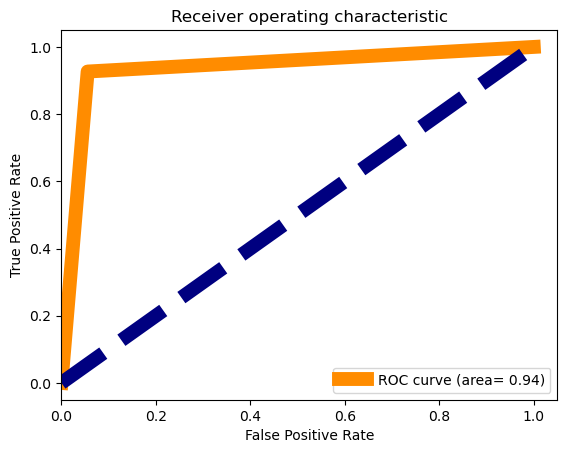

In [66]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(rf_pred, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the best model

In [67]:
import pickle
filename="Rainfall Weather Forecasting.pkl "
pickle.dump(rf, open(filename,'wb'))

# 2. Building Model for Raifall

Visualizing correlation between features and target

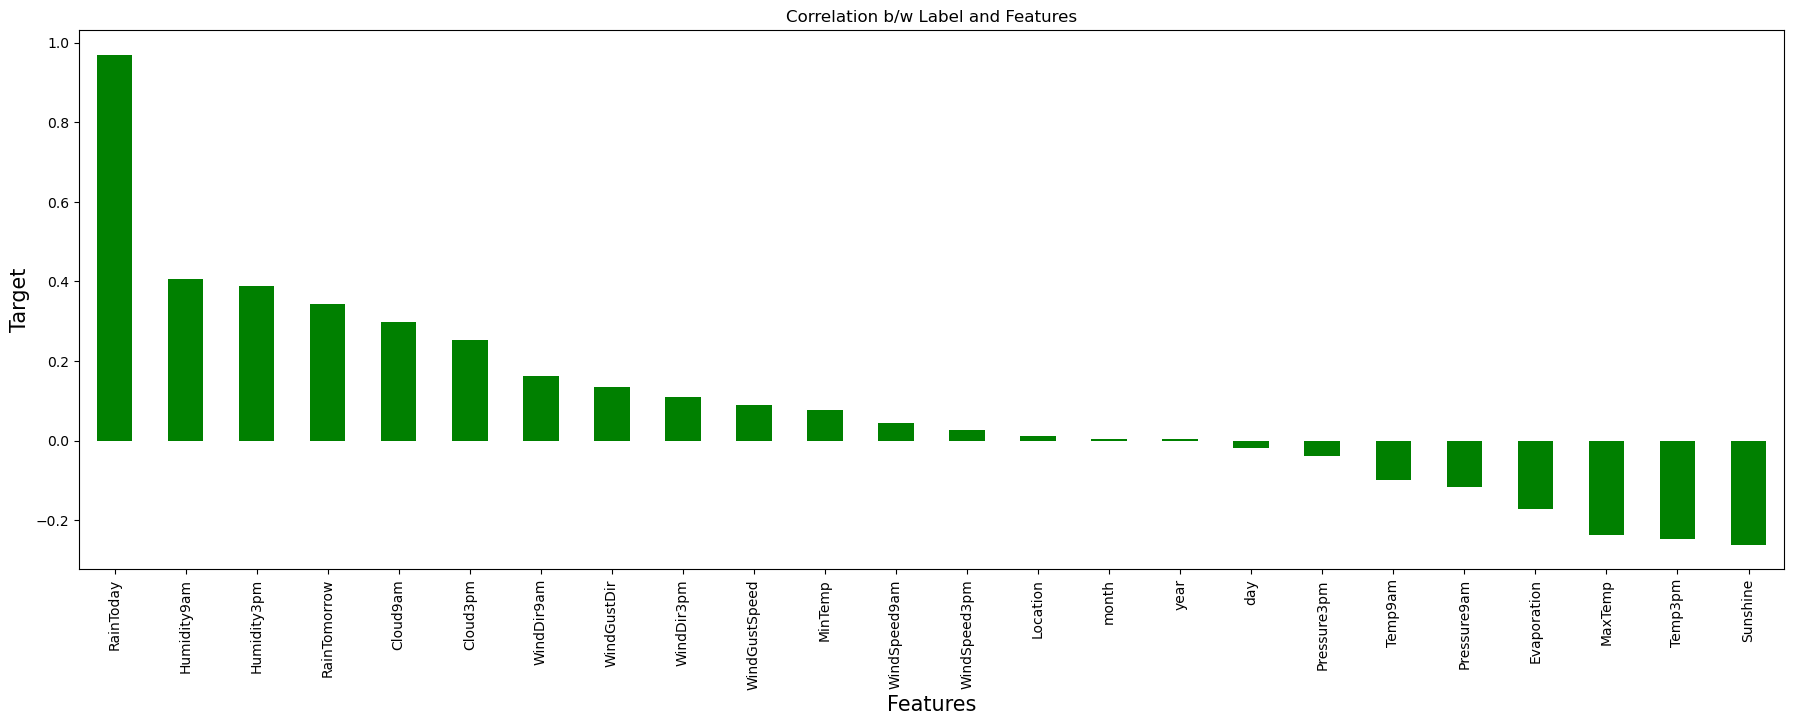

In [68]:
plt.figure(figsize=(22,7))
data.corr()['Rainfall'].sort_values(ascending = False).drop(['Rainfall']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation b/w Label and Features')
plt.show()

## Separating Features and Target

In [69]:
x=data.drop('Rainfall',axis=1)
y=data['Rainfall']

Scaling the data Using Standard Scaler

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,-1.504557,0.048398,-0.152436,-0.022834,0.009588,1.231615,0.325430,1.252672,1.396867,0.648735,...,-1.364419,1.358268,0.161068,-0.150403,-0.101901,-0.565772,-0.559099,-1.649084,1.651735,-1.678095
1,-1.504557,-1.060100,0.208553,-0.022834,0.009588,1.443837,0.325430,-0.273018,1.622461,-0.982396,...,-1.248063,0.140845,0.161068,-0.096925,0.321410,-0.565772,-0.559099,-1.649084,1.651735,-1.564377
2,-1.504557,-0.043977,0.307004,-0.022834,0.009588,1.656059,0.476309,1.252672,1.622461,0.546789,...,-1.098463,0.140845,-1.124771,0.580467,0.135153,-0.565772,-0.559099,-1.649084,1.651735,-1.450659
3,-1.504557,-0.727551,0.684401,-0.022834,0.009588,-0.678379,-1.183364,0.380849,-1.761435,-0.268776,...,-0.416952,0.140845,0.161068,0.063510,0.693924,-0.565772,-0.559099,-1.649084,1.651735,-1.336941
4,-1.504557,0.805871,1.389969,-0.022834,0.009588,1.231615,0.099111,-1.362797,-0.182284,-0.676559,...,-1.547263,0.952460,1.446908,0.010032,1.235762,-0.565772,-0.559099,-1.649084,1.651735,-1.223223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074,1.016050,-1.780624,-0.332930,-0.022834,0.009588,-1.527265,-0.655286,-1.144841,-1.761435,0.139007,...,0.979314,0.140845,0.161068,-1.487360,-0.254292,-0.565772,-0.559099,1.984448,-0.110867,0.482544
8075,1.016050,-1.909948,-0.070393,-0.022834,0.009588,-1.527265,-0.655286,0.380849,-1.535842,-0.064885,...,0.829714,0.140845,0.161068,-1.362578,-0.000306,-0.565772,-0.559099,1.984448,-0.110867,0.596262
8076,1.016050,-1.762149,0.241370,-0.022834,0.009588,-0.253936,-1.334243,0.380849,-1.084656,-0.064885,...,0.630247,0.140845,0.161068,-1.219969,0.355275,-0.565772,-0.559099,1.984448,-0.110867,0.709980
8077,1.016050,-1.429599,0.503907,-0.022834,0.009588,-0.890600,-0.202648,0.380849,1.396867,-0.472668,...,0.247936,0.140845,0.161068,-0.934751,0.626194,-0.565772,-0.559099,1.984448,-0.110867,0.823698


## Checking Multicolinearity

In [71]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [73]:
calc_vif(x)

,variables,VIF FACTOR
0,Location,1.568163
1,MinTemp,8.784774
2,MaxTemp,25.144177
3,Evaporation,1.585530
4,Sunshine,1.920799
5,WindGustDir,1.603347
6,WindGustSpeed,2.566348
7,WindDir9am,1.350003
8,WindDir3pm,1.487113
9,WindSpeed9am,2.104083


In [74]:
x.drop('Temp3pm',axis=1, inplace=True)

In [75]:
calc_vif(x)

,variables,VIF FACTOR
0,Location,1.567131
1,MinTemp,8.732114
2,MaxTemp,9.482559
3,Evaporation,1.584351
4,Sunshine,1.918797
5,WindGustDir,1.601560
6,WindGustSpeed,2.553579
7,WindDir9am,1.348885
8,WindDir3pm,1.485231
9,WindSpeed9am,2.103534


In [76]:
x.drop('Pressure9am',axis=1,inplace=True)

In [77]:
calc_vif(x)

,variables,VIF FACTOR
0,Location,1.566989
1,MinTemp,8.617870
2,MaxTemp,9.122492
3,Evaporation,1.565331
4,Sunshine,1.901075
5,WindGustDir,1.587400
6,WindGustSpeed,2.529971
7,WindDir9am,1.330887
8,WindDir3pm,1.405835
9,WindSpeed9am,2.100700


In [78]:
x.drop('Temp9am',axis=1,inplace=True)

In [79]:
calc_vif(x)

,variables,VIF FACTOR
0,Location,1.564967
1,MinTemp,4.513996
2,MaxTemp,5.399652
3,Evaporation,1.561398
4,Sunshine,1.891208
5,WindGustDir,1.584465
6,WindGustSpeed,2.494281
7,WindDir9am,1.330886
8,WindDir3pm,1.405077
9,WindSpeed9am,2.077286


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=41)

## Linear Regression

In [82]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred=lr.predict(x_test)
print('r2_score :',r2_score(y_test,lr_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,lr_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,lr_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,lr_pred)))

r2_score : 0.9518345357750335
Mean Absolute Error:  0.13321594425696281
Mean Squared Error:  0.0477371418137398
Root Mean Squared Error:  0.2184883104739011


## RandomForestRegressor

In [83]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pred=rf.predict(x_test)
print('r2_score :',r2_score(y_test,rf_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,rf_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,rf_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,rf_pred)))

r2_score : 0.9615322221770735
Mean Absolute Error:  0.10872400990099013
Mean Squared Error:  0.0381256943069307
Root Mean Squared Error:  0.19525801982743424


## DecisionTreeRegressor

In [84]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt_pred=dt.predict(x_test)
print('r2_score :',r2_score(y_test,dt_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,dt_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,dt_pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,dt_pred)))

r2_score : 0.9259566515925346
Mean Absolute Error:  0.10154702970297032
Mean Squared Error:  0.073384900990099
Root Mean Squared Error:  0.27089647651842763
